# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Загрузка и изучение данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display
from numpy.random import RandomState
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import mean_absolute_error, accuracy_score

pd.options.mode.chained_assignment = None

from sklearn.metrics import mean_absolute_error, accuracy_score

In [2]:
#Загрузим данные из файлов, изучим структуры таблиц

def data_read(file):
    """
    input:        file [object] - путь к файлу
    output:       data [DataFrame] - таблица данных
    description:  функция загружает таблицу функцией read_csv, выводит первые 10 строк на экран,
                  выводит информацию о данных методом info(), считает количество дубликатов
    """
    # читаем данные из .csv файла с помощью метода read_csv()
    data = pd.read_csv(file, index_col = 'date')
    display(data.head(10))
    print(data.info())
    print('Количество дубликатов:', sum(data.duplicated()))
    return data

In [3]:
#исходные данные
full = data_read('/datasets/gold_recovery_full.csv')

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 00:00:00                     6.055403                     9.889648   
2016-01-15 01:00:00                     6.029369                     9.968944   
2016-01-15 02:00:00                     6.055926                    10.213995   
2016-01-15 03:00:00                     6.047977                     9.977019   
2016-01-15 04:00:00                     6.148599                    10.142511   
2016-01-15 05:00:00                     6.482968                    10.049416   
2016-01-15 06:00:00                     6.533849                    10.058141   
2016-01-15 07:00:00                     6.130823                     9.935481   
2016-01-15 08:00:00                     5.834140                    10.071156   
2016-01-15 09:00:00                     5.687063                     9.980404   

                     final.output.concentrate_sol  \
date                                                
2016-01-15 00:00:00                      5.507324   
2016-01-15 01:00:00                      5.257781   
2016-01-15 02:00:00                      5.383759   
2016-01-15 03:00:00                      4.858634   
2016-01-15 04:00:00                      4.939416   
2016-01-15 05:00:00                      5.480257   
2016-01-15 06:00:00                      4.569100   
2016-01-15 07:00:00                      4.389813   
2016-01-15 08:00:00                      4.876389   
2016-01-15 09:00:00                      5.282514   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-15 00:00:00                    42.192020              70.541216   
2016-01-15 01:00:00                    42.701629              69.266198   
2016-01-15 02:00:00                    42.657501              68.116445   
2016-01-15 03:00:00                    42.689819              68.347543   
2016-01-15 04:00:00                    42.774141              66.927016   
2016-01-15 05:00:00                    41.633678              69.465816   
2016-01-15 06:00:00                    41.995316              69.300835   
2016-01-15 07:00:00                    42.452727              70.230976   
2016-01-15 08:00:00                    43.404078              69.688595   
2016-01-15 09:00:00                    43.235220              70.279619   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-15 00:00:00             10.411962              0.895447   
2016-01-15 01:00:00             10.462676              0.927452   
2016-01-15 02:00:00             10.507046              0.953716   
2016-01-15 03:00:00             10.422762              0.883763   
2016-01-15 04:00:00             10.360302              0.792826   
2016-01-15 05:00:00             10.182708              0.664118   
2016-01-15 06:00:00             10.304598              0.807342   
2016-01-15 07:00:00             10.443288              0.949346   
2016-01-15 08:00:00             10.420140              1.065453   
2016-01-15 09:00:00             10.487013              1.159805   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-15 00:00:00              16.904297              2.143149   
2016-01-15 01:00:00              16.634514              2.224930   
2016-01-15 02:00:00              16.208849              2.257889   
2016-01-15 03:00:00              16.532835              2.146849   
2016-01-15 04:00:00              16.525686              2.055292   
2016-01-15 05:00:00              16.999638              1.918586   
2016-01-15 06:00:00              16.723575              2.058913   
2016-01-15 07:00:00              16.689959              2.143437   
2016-01-15 08:00:00      

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                             

In [4]:
#обучающая выборка
train = data_read('/datasets/gold_recovery_train.csv')

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 00:00:00                     6.055403                     9.889648   
2016-01-15 01:00:00                     6.029369                     9.968944   
2016-01-15 02:00:00                     6.055926                    10.213995   
2016-01-15 03:00:00                     6.047977                     9.977019   
2016-01-15 04:00:00                     6.148599                    10.142511   
2016-01-15 05:00:00                     6.482968                    10.049416   
2016-01-15 06:00:00                     6.533849                    10.058141   
2016-01-15 07:00:00                     6.130823                     9.935481   
2016-01-15 08:00:00                     5.834140                    10.071156   
2016-01-15 09:00:00                     5.687063                     9.980404   

                     final.output.concentrate_sol  \
date                                                
2016-01-15 00:00:00                      5.507324   
2016-01-15 01:00:00                      5.257781   
2016-01-15 02:00:00                      5.383759   
2016-01-15 03:00:00                      4.858634   
2016-01-15 04:00:00                      4.939416   
2016-01-15 05:00:00                      5.480257   
2016-01-15 06:00:00                      4.569100   
2016-01-15 07:00:00                      4.389813   
2016-01-15 08:00:00                      4.876389   
2016-01-15 09:00:00                      5.282514   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-15 00:00:00                    42.192020              70.541216   
2016-01-15 01:00:00                    42.701629              69.266198   
2016-01-15 02:00:00                    42.657501              68.116445   
2016-01-15 03:00:00                    42.689819              68.347543   
2016-01-15 04:00:00                    42.774141              66.927016   
2016-01-15 05:00:00                    41.633678              69.465816   
2016-01-15 06:00:00                    41.995316              69.300835   
2016-01-15 07:00:00                    42.452727              70.230976   
2016-01-15 08:00:00                    43.404078              69.688595   
2016-01-15 09:00:00                    43.235220              70.279619   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-15 00:00:00             10.411962              0.895447   
2016-01-15 01:00:00             10.462676              0.927452   
2016-01-15 02:00:00             10.507046              0.953716   
2016-01-15 03:00:00             10.422762              0.883763   
2016-01-15 04:00:00             10.360302              0.792826   
2016-01-15 05:00:00             10.182708              0.664118   
2016-01-15 06:00:00             10.304598              0.807342   
2016-01-15 07:00:00             10.443288              0.949346   
2016-01-15 08:00:00             10.420140              1.065453   
2016-01-15 09:00:00             10.487013              1.159805   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-15 00:00:00              16.904297              2.143149   
2016-01-15 01:00:00              16.634514              2.224930   
2016-01-15 02:00:00              16.208849              2.257889   
2016-01-15 03:00:00              16.532835              2.146849   
2016-01-15 04:00:00              16.525686              2.055292   
2016-01-15 05:00:00              16.999638              1.918586   
2016-01-15 06:00:00              16.723575              2.058913   
2016-01-15 07:00:00              16.689959              2.143437   
2016-01-15 08:00:00      

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                             

In [5]:
#тестовая выборка
test = data_read('/datasets/gold_recovery_test.csv')

primary_cleaner.input.sulfate  \
date                                                 
2016-09-01 00:59:59                     210.800909   
2016-09-01 01:59:59                     215.392455   
2016-09-01 02:59:59                     215.259946   
2016-09-01 03:59:59                     215.336236   
2016-09-01 04:59:59                     199.099327   
2016-09-01 05:59:59                     168.485085   
2016-09-01 06:59:59                     144.133440   
2016-09-01 07:59:59                     133.513396   
2016-09-01 08:59:59                     133.735356   
2016-09-01 09:59:59                     126.961069   

                     primary_cleaner.input.depressant  \
date                                                    
2016-09-01 00:59:59                         14.993118   
2016-09-01 01:59:59                         14.987471   
2016-09-01 02:59:59                         12.884934   
2016-09-01 03:59:59                         12.006805   
2016-09-01 04:59:59                         10.682530   
2016-09-01 05:59:59                          8.817007   
2016-09-01 06:59:59                          7.924610   
2016-09-01 07:59:59                          8.055252   
2016-09-01 08:59:59                          7.999618   
2016-09-01 09:59:59                          8.017856   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-09-01 00:59:59                         8.080000   
2016-09-01 01:59:59                         8.080000   
2016-09-01 02:59:59                         7.786667   
2016-09-01 03:59:59                         7.640000   
2016-09-01 04:59:59                         7.530000   
2016-09-01 05:59:59                         7.420000   
2016-09-01 06:59:59                         7.420000   
2016-09-01 07:59:59                         6.988000   
2016-09-01 08:59:59                         6.935000   
2016-09-01 09:59:59                         7.030000   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-09-01 00:59:59                        1.005021   
2016-09-01 01:59:59                        0.990469   
2016-09-01 02:59:59                        0.996043   
2016-09-01 03:59:59                        0.863514   
2016-09-01 04:59:59                        0.805575   
2016-09-01 05:59:59                        0.791191   
2016-09-01 06:59:59                        0.788838   
2016-09-01 07:59:59                        0.801871   
2016-09-01 08:59:59                        0.789329   
2016-09-01 09:59:59                        0.805298   

                     primary_cleaner.state.floatbank8_a_air  \
date                                                          
2016-09-01 00:59:59                             1398.981301   
2016-09-01 01:59:59                             1398.777912   
2016-09-01 02:59:59                             1398.493666   
2016-09-01 03:59:59                             1399.618111   
2016-09-01 04:59:59                             1401.268123   
2016-09-01 05:59:59                             1402.826803   
2016-09-01 06:59:59                             1398.252401   
2016-09-01 07:59:59                             1401.669677   
2016-09-01 08:59:59                             1402.358981   
2016-09-01 09:59:59                             1400.816120   

                     primary_cleaner.state.floatbank8_a_level  \
date                                                            
2016-09-01 00:59:59                               -500.225577   
2016-09-01 01:59:59                               -500.057435   
2016-09-01 02:59:59                               -500.868360   
2016-09-01 03:59:59                               -498.863574   
2016-09-01 04:59:59                               -500.808305   
2016-09-01 05:59:59                               -499.299521   
2016-09-01 06:59:59                               -499.748672   
2016-09-01 

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 non-null

- Данные соответствуют описанию. Всего 22716 объектов и 87 признаков
- Пропуски в данных требуют дальнейшего исследования.
- Типы данных соответствуют описанию.

In [6]:
#Посмотрим на распределения данных в исходной таблице
#Удалим объекты, где пропущено более половины признаков, так как такие данные не помогут в формировании модели

train = train.drop(train.loc[(~train.isnull()).sum(axis=1) < 44].index, axis = 0)
test = test.drop(test.loc[(~test.isnull()).sum(axis=1) < 28].index, axis = 0)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


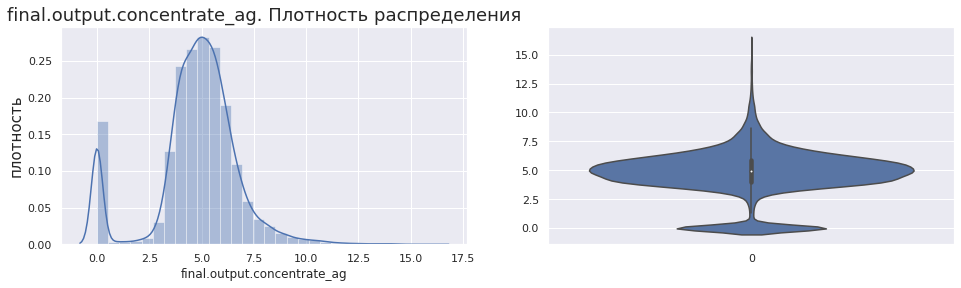

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


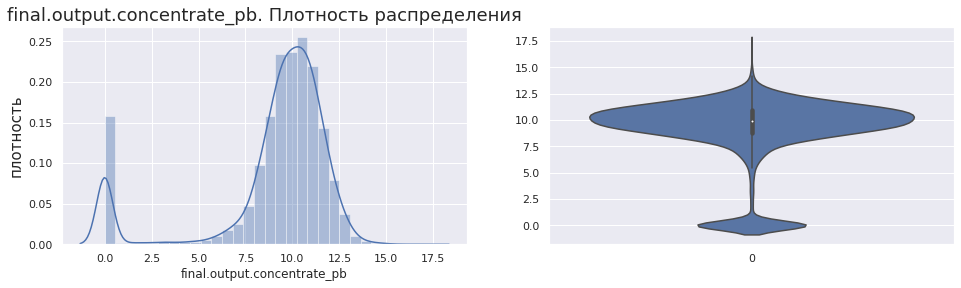

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


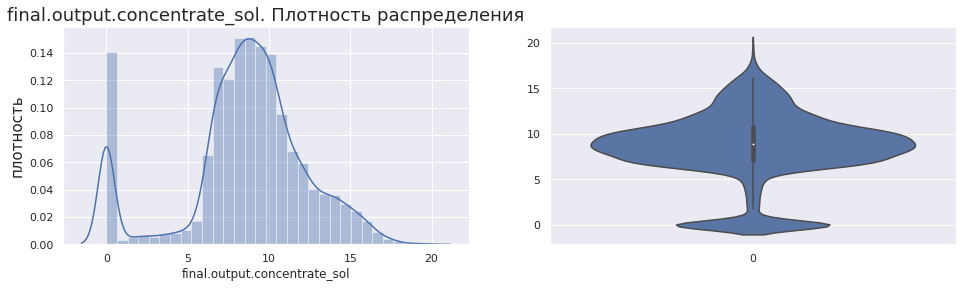

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


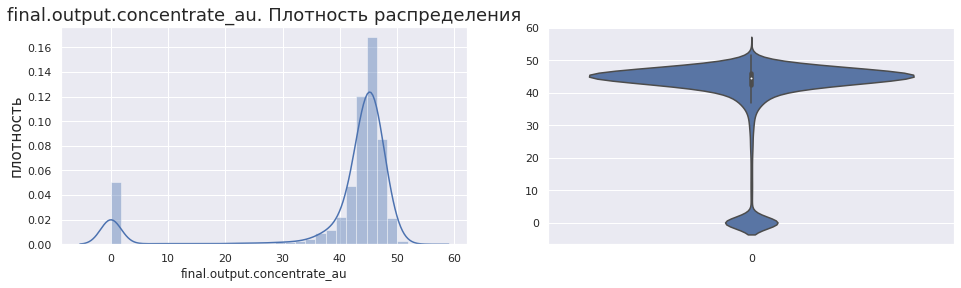

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


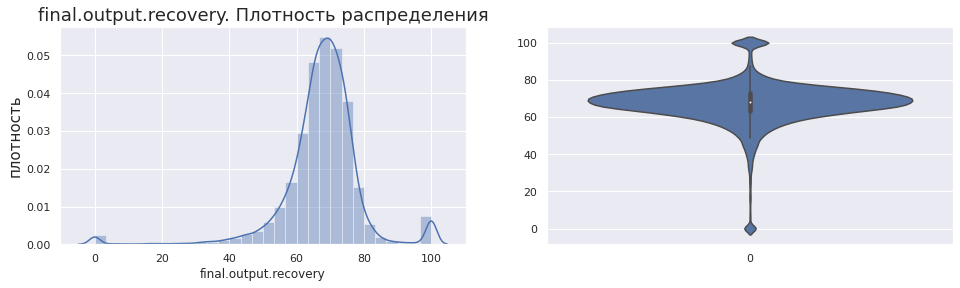

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


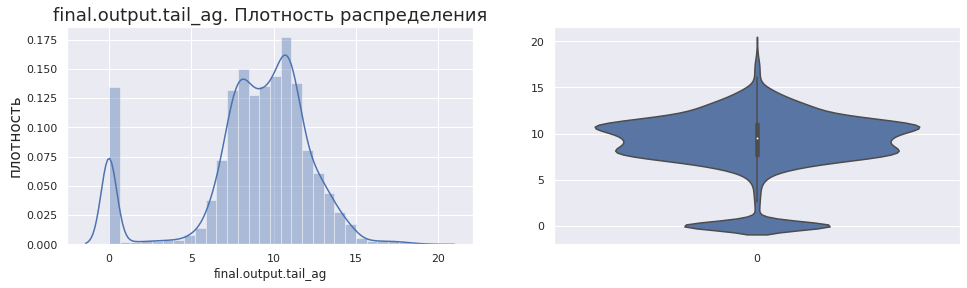

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


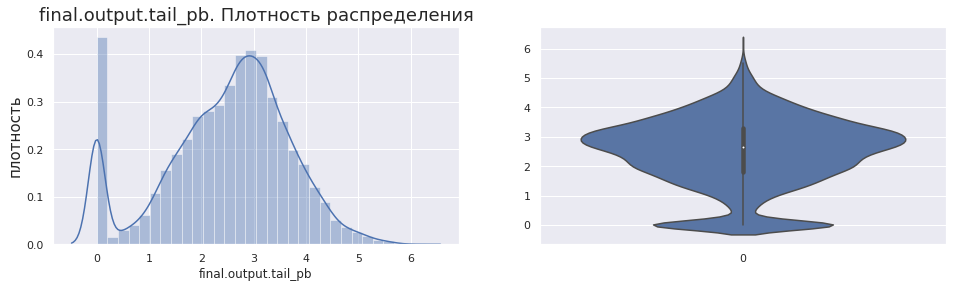

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


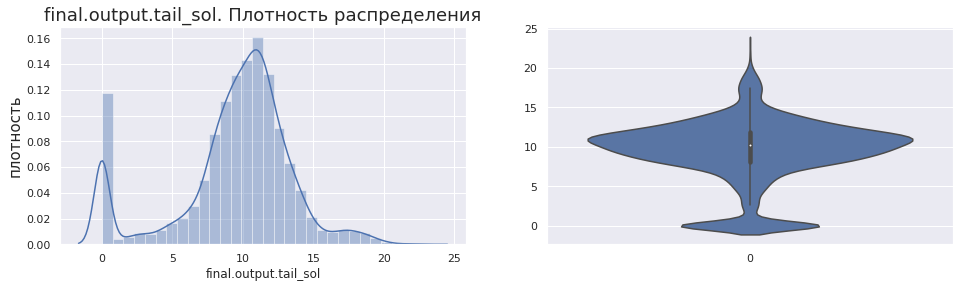

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


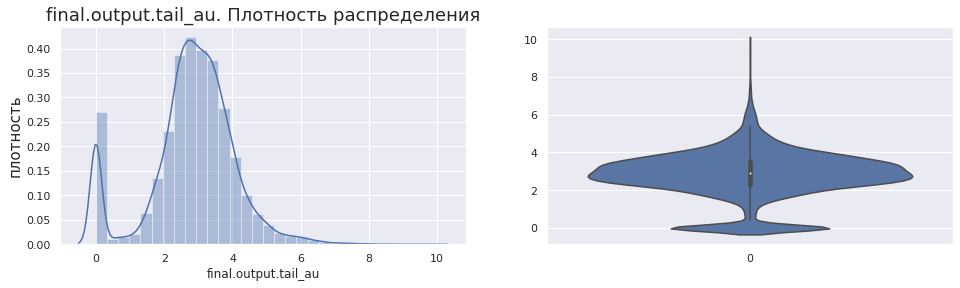

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


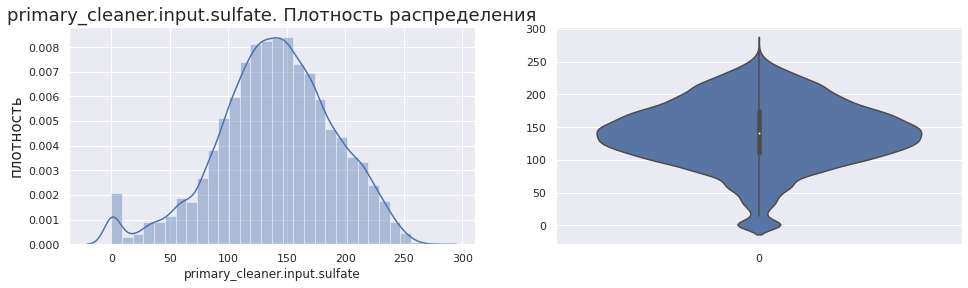

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


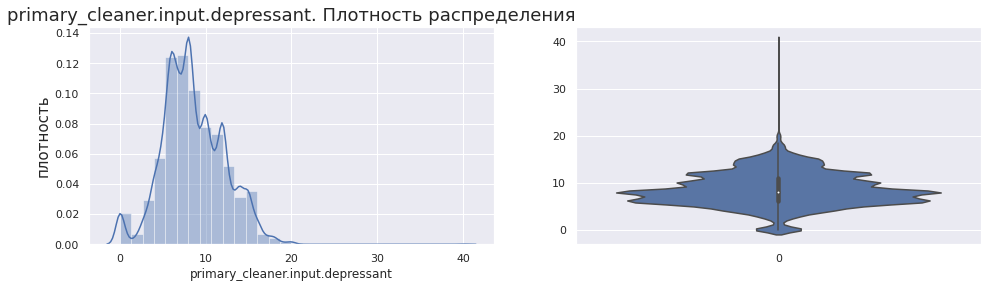

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


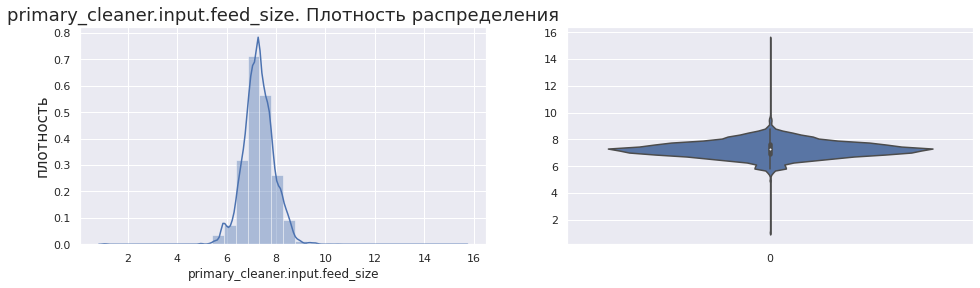

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


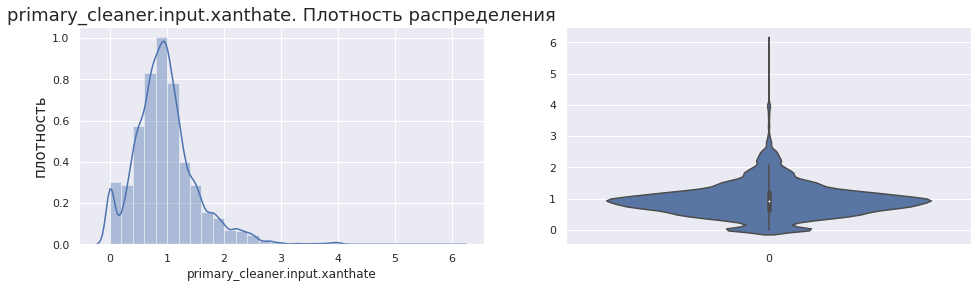

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


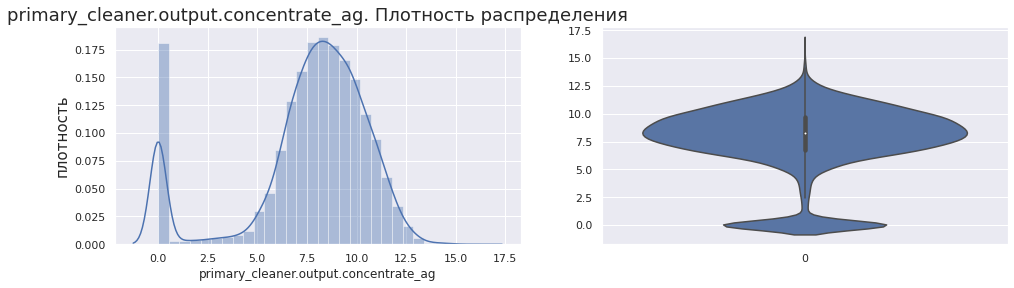

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


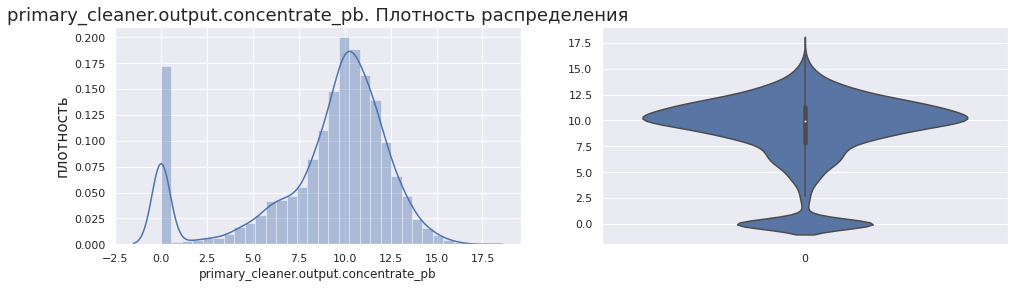

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


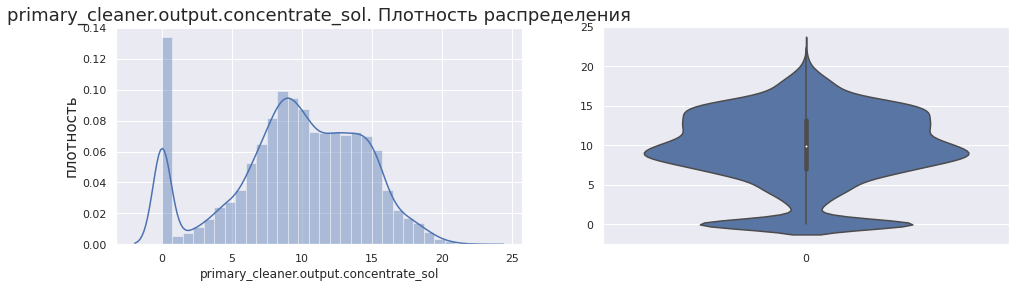

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


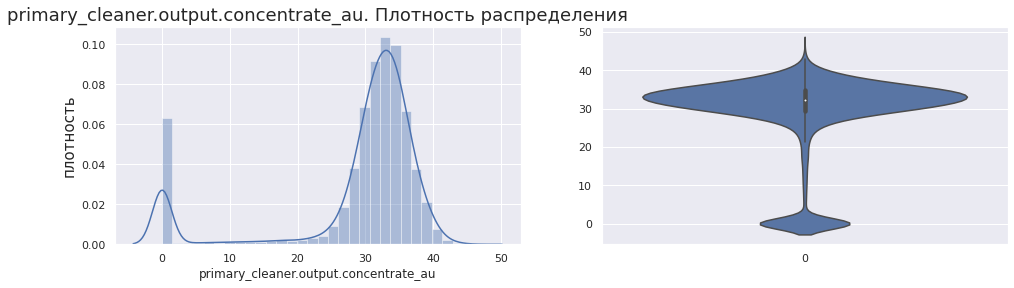

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


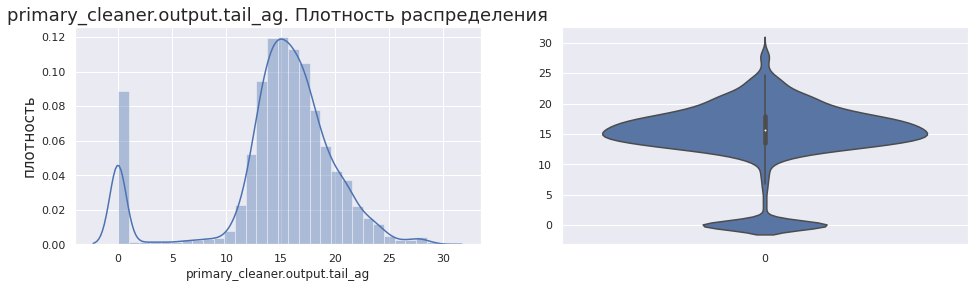

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


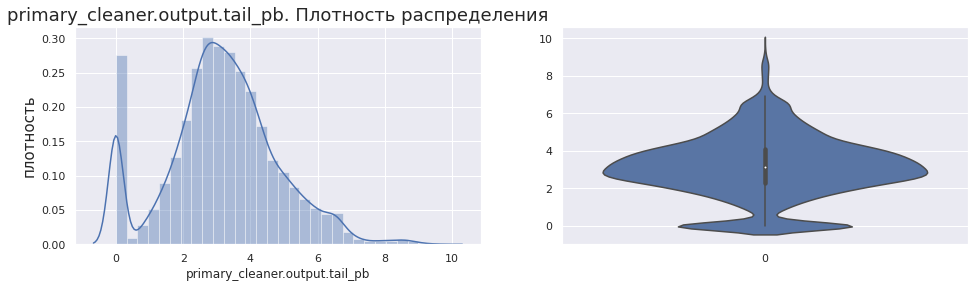

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


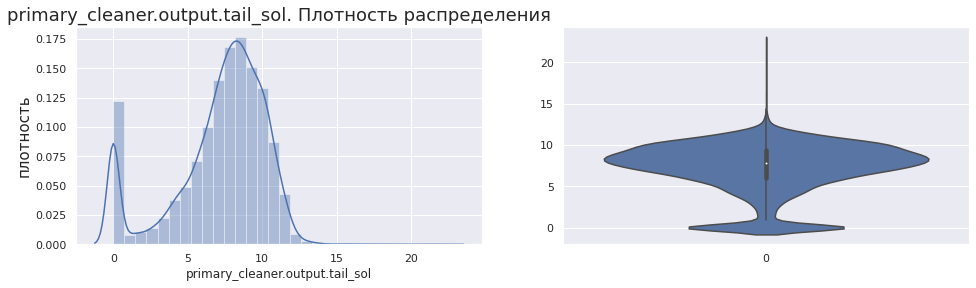

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


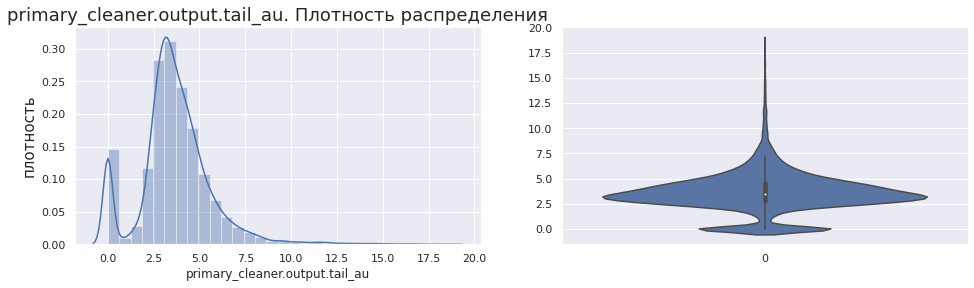

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


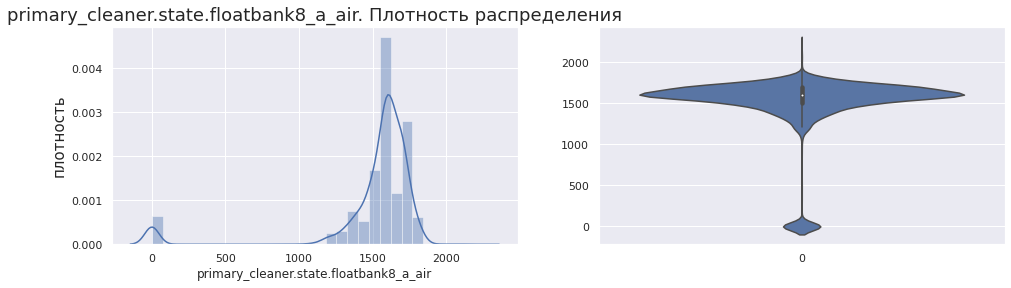

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


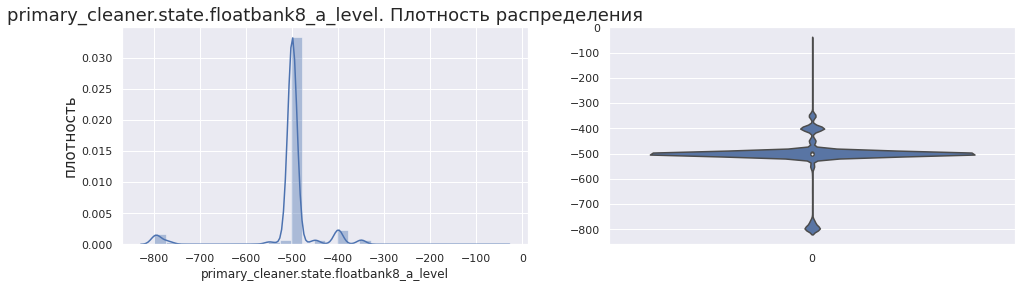

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


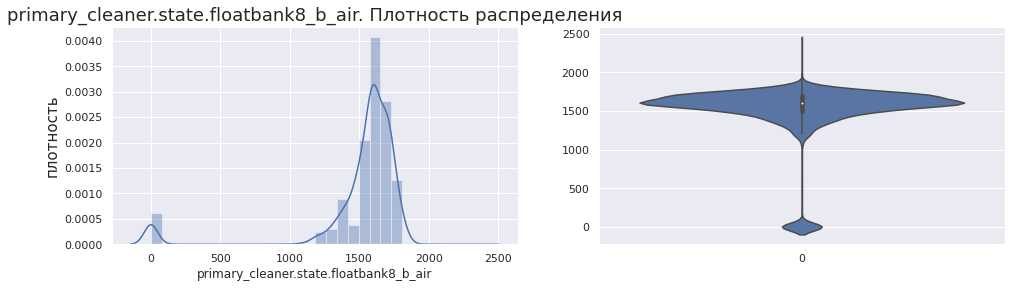

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


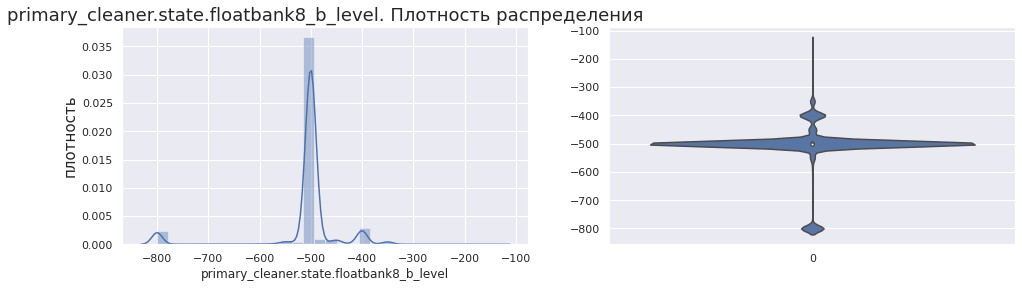

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


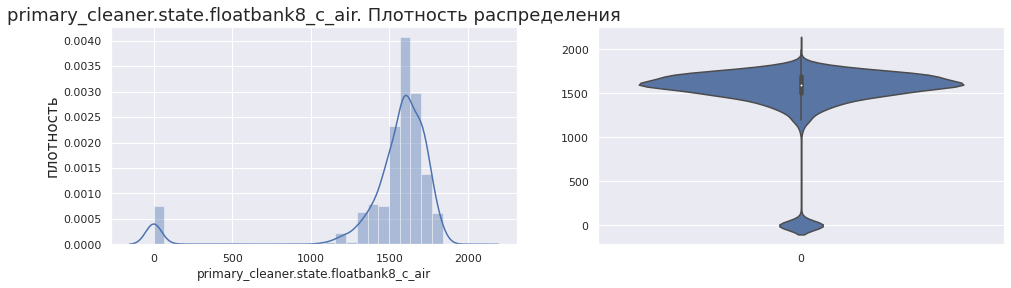

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


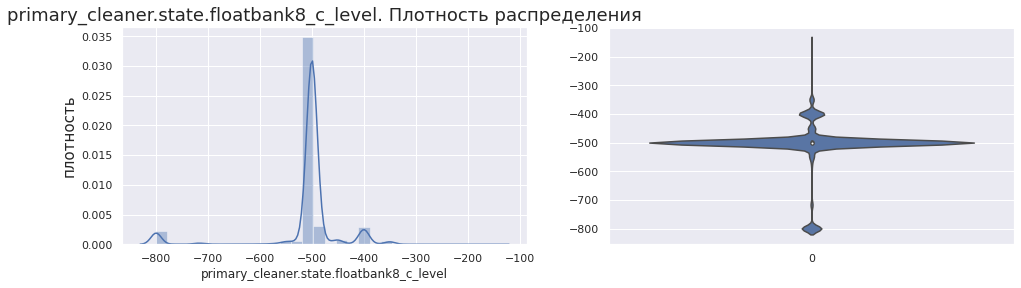

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


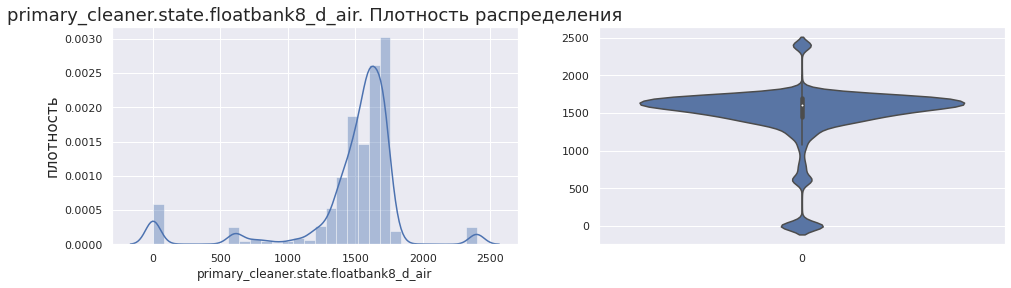

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


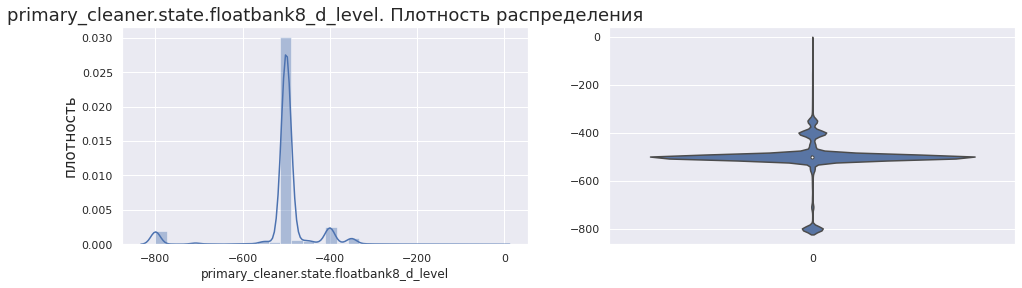

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


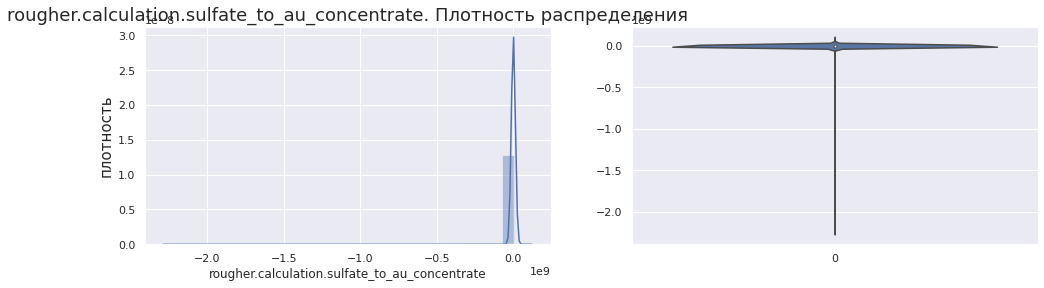

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


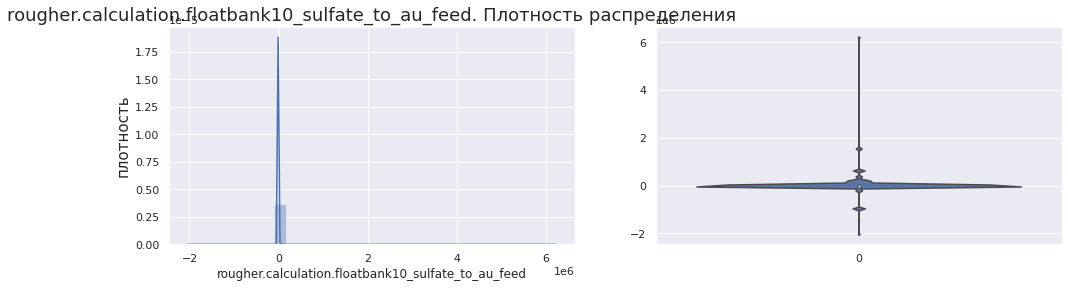

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


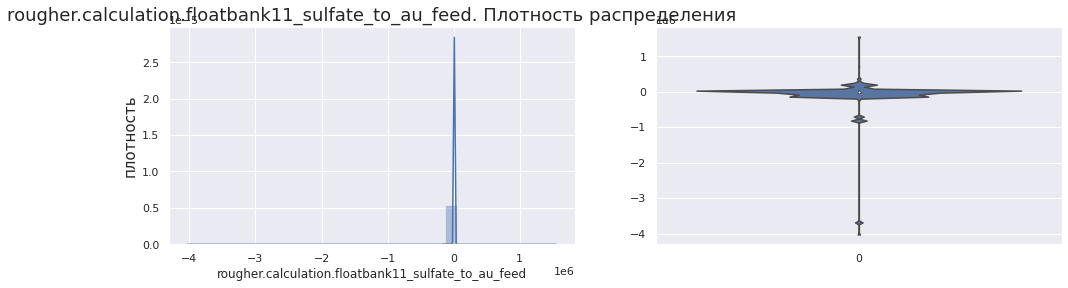

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


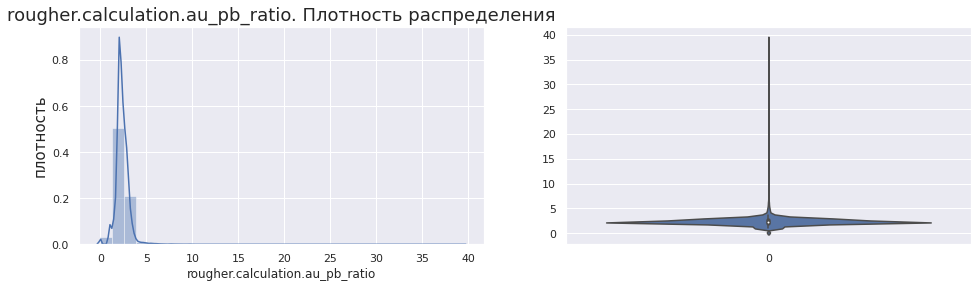

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


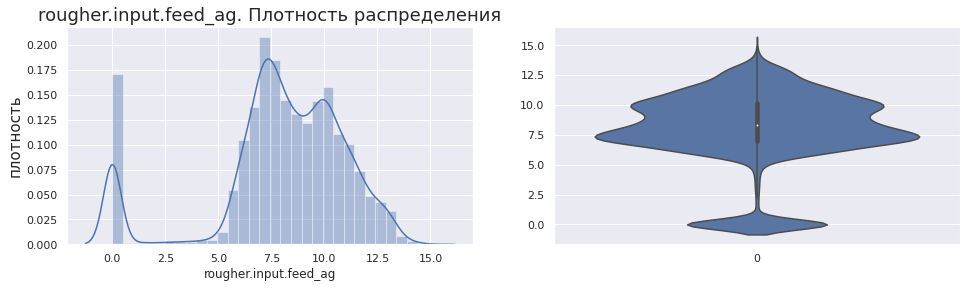

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


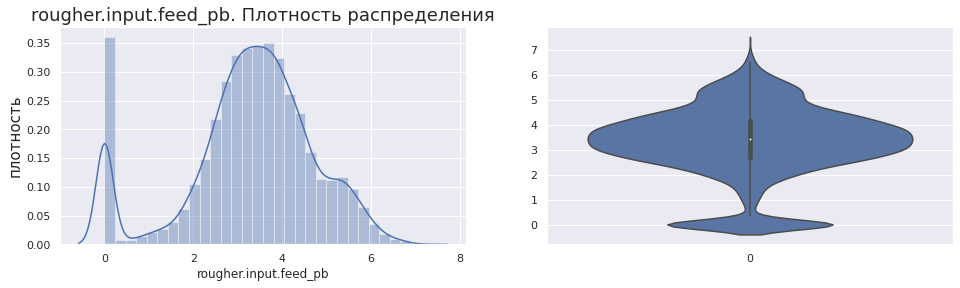

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


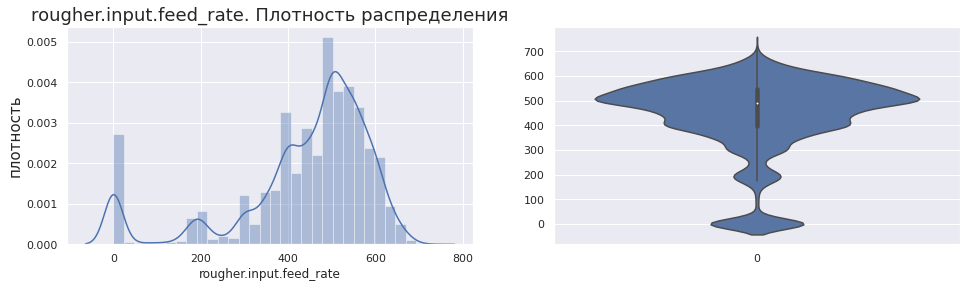

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


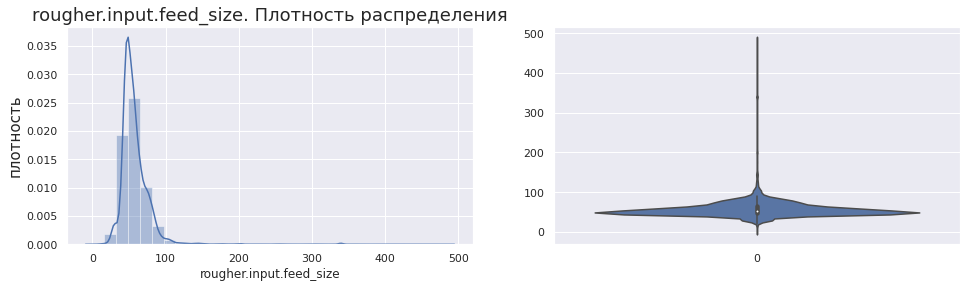

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


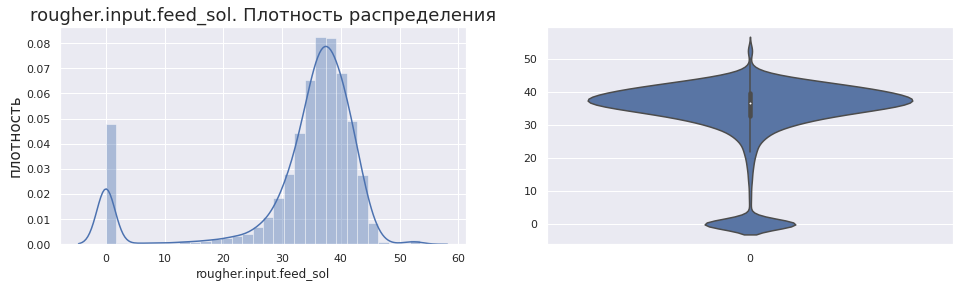

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


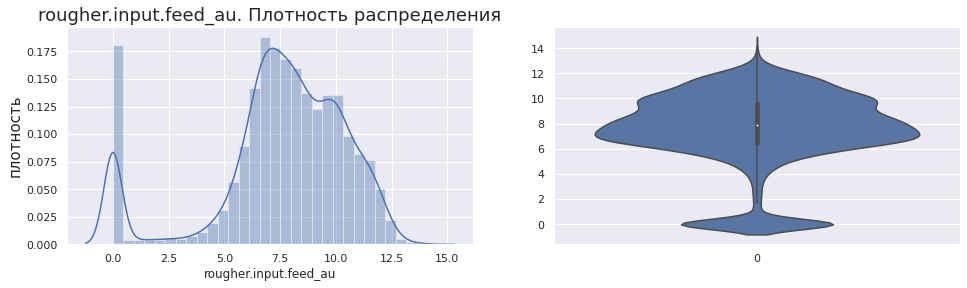

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


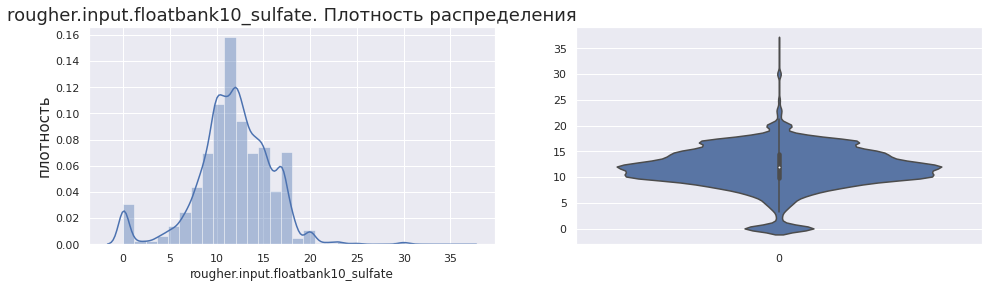

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


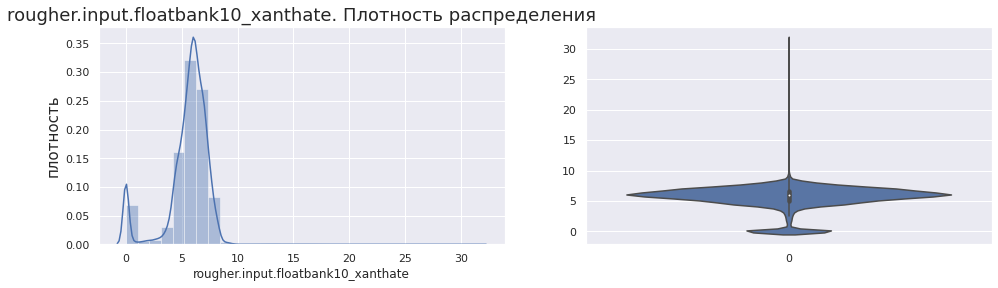

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


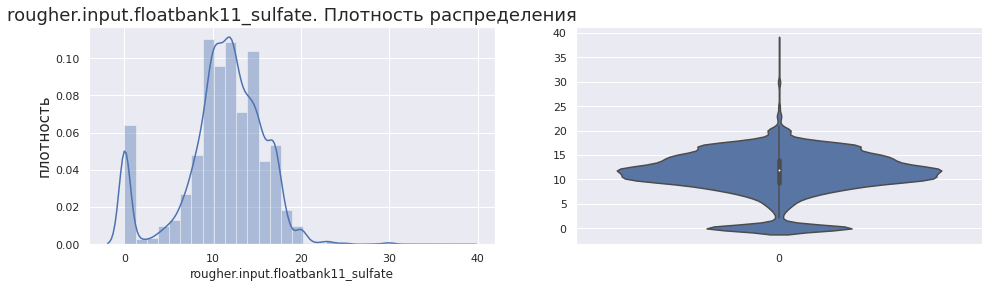

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


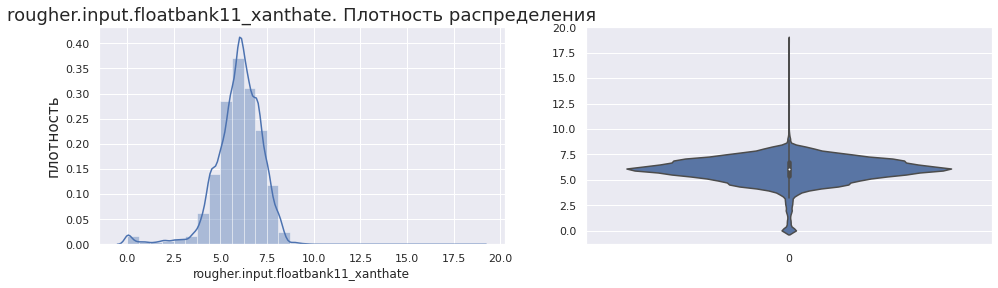

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


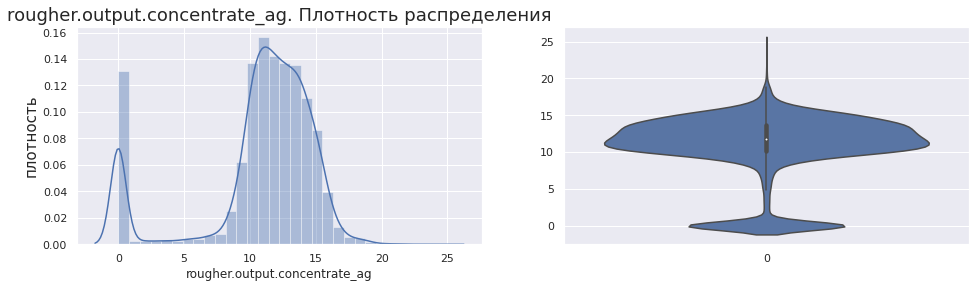

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


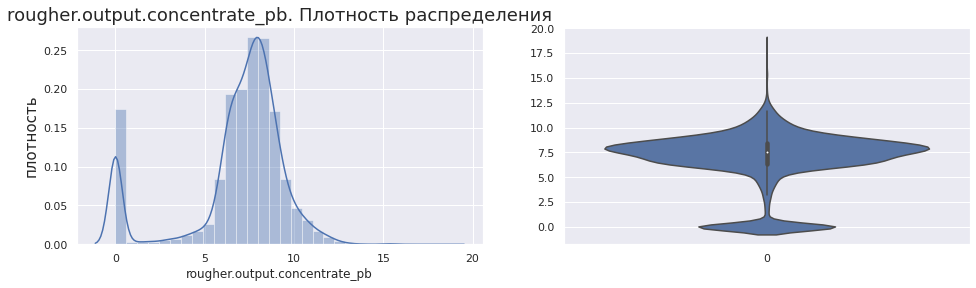

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


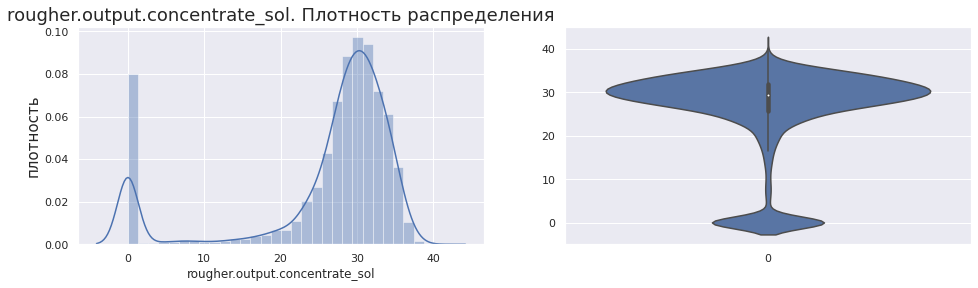

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


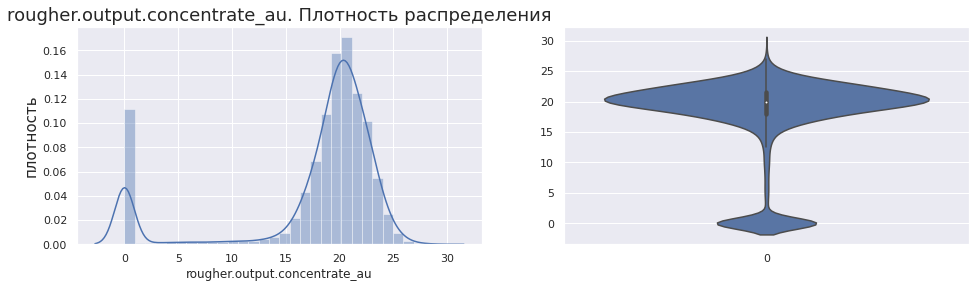

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


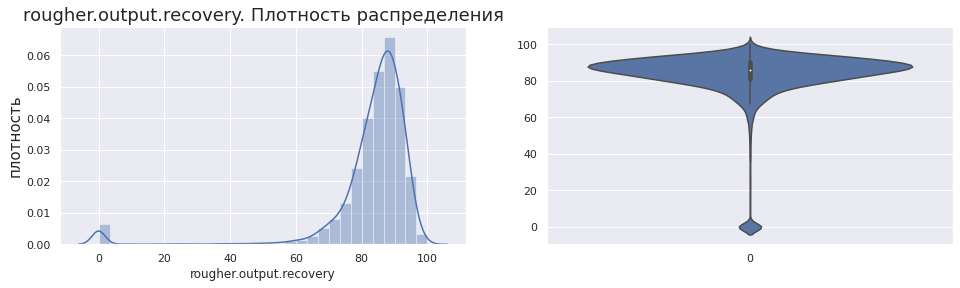

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


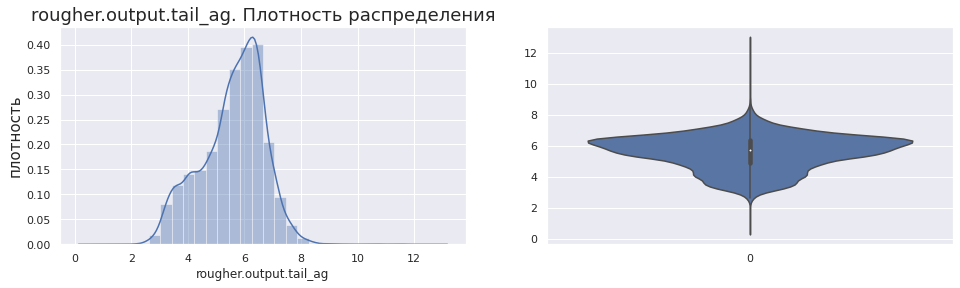

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


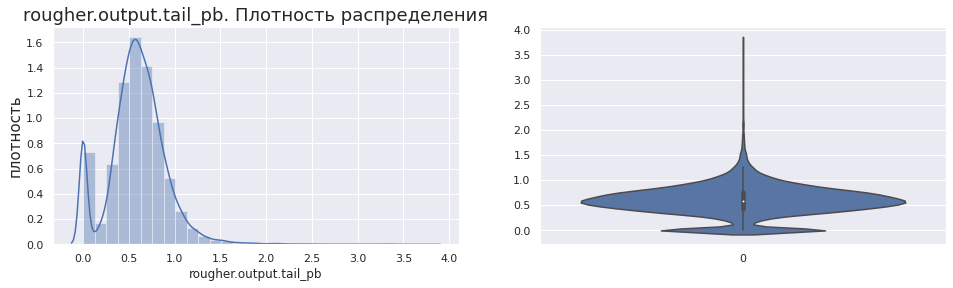

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


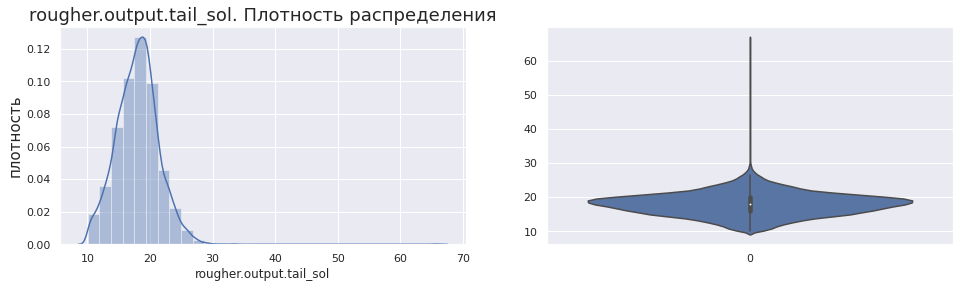

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


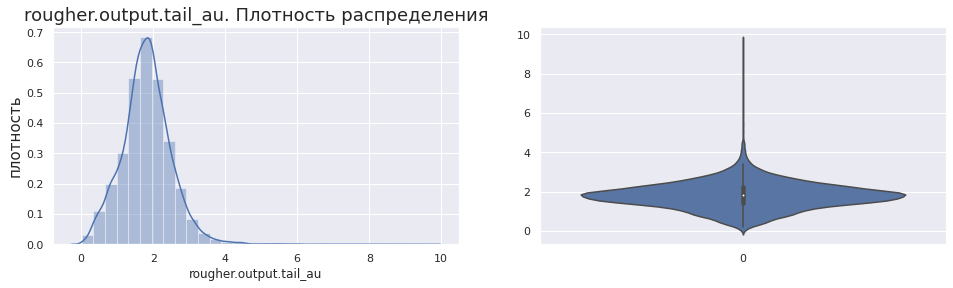

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


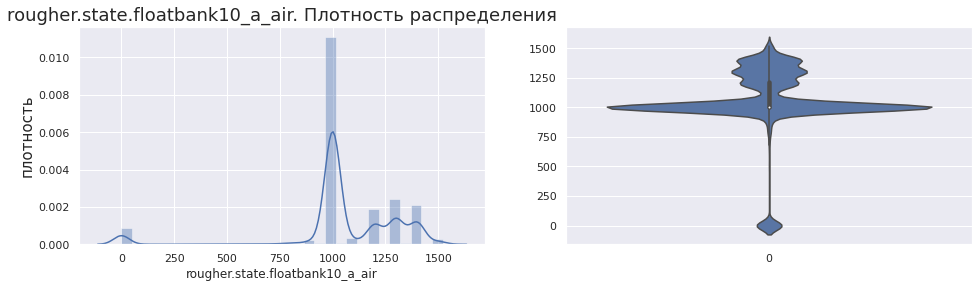

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


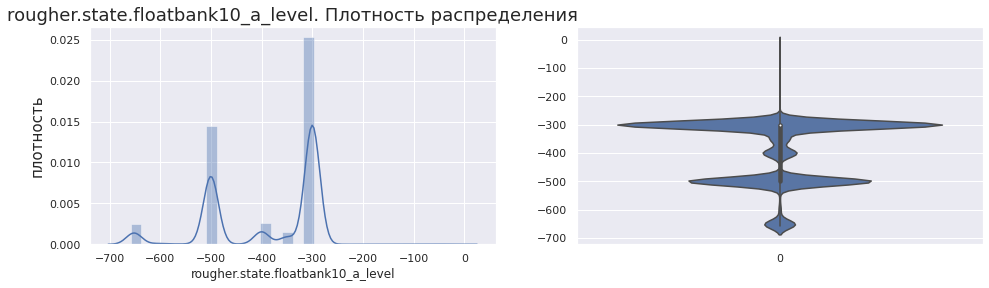

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


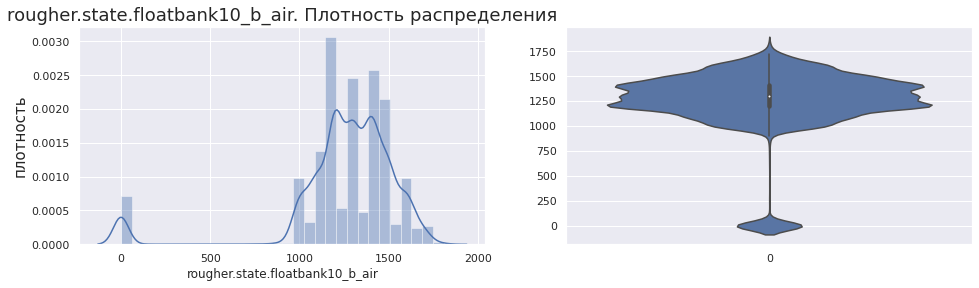

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


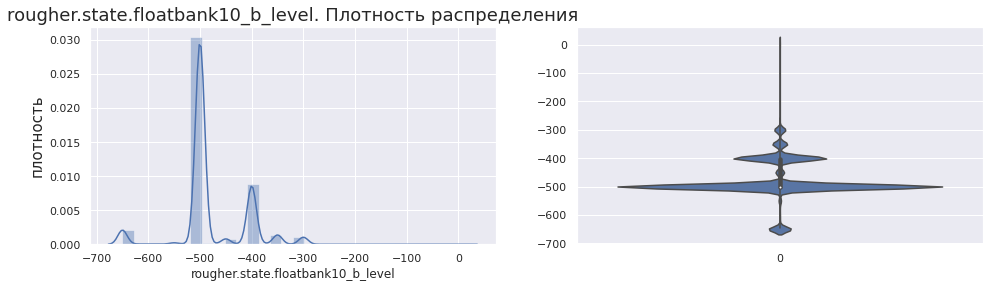

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


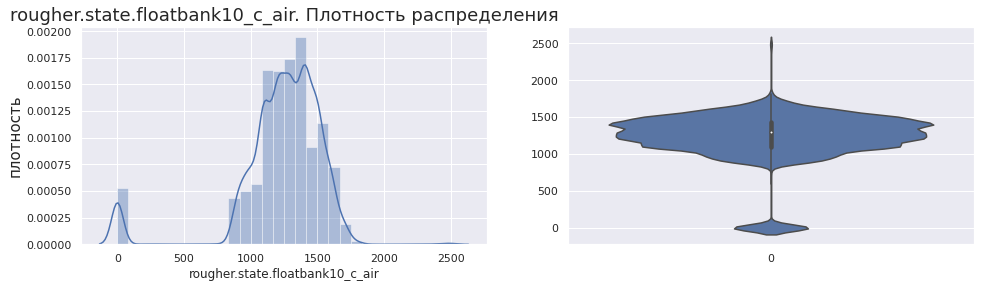

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


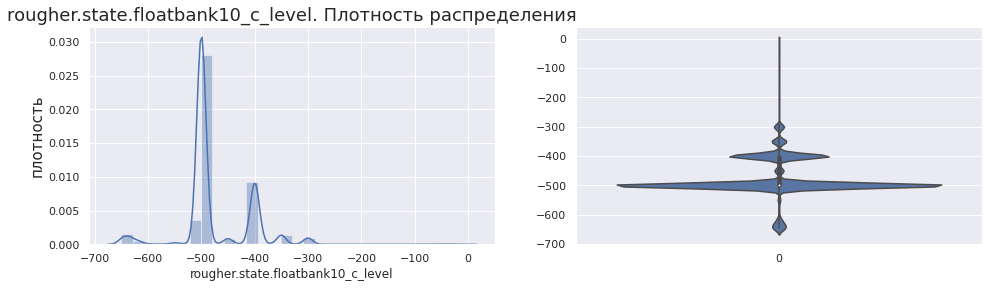

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


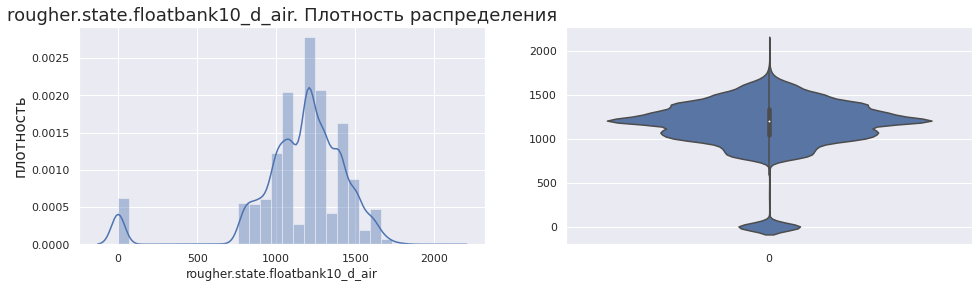

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


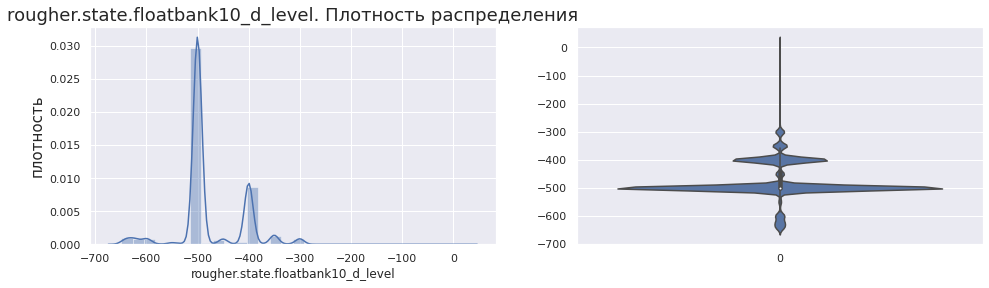

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


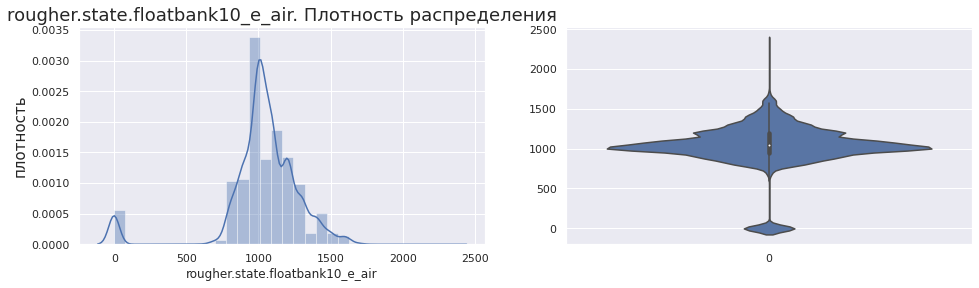

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


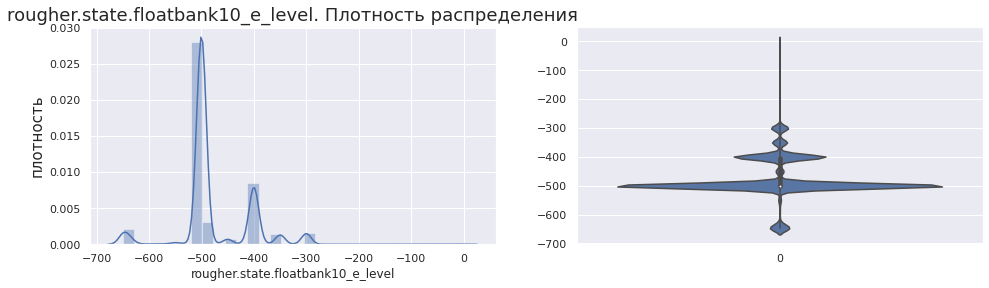

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


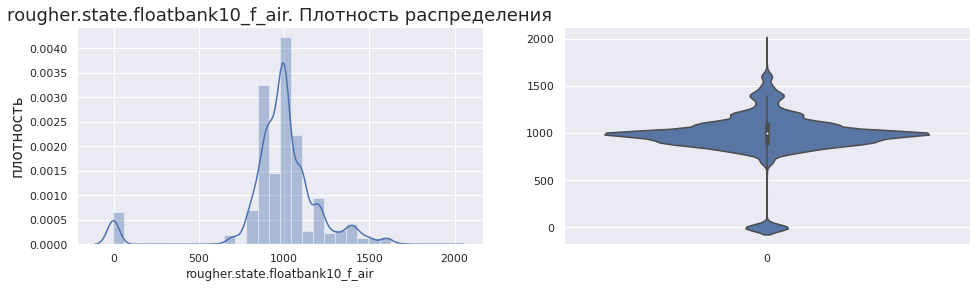

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


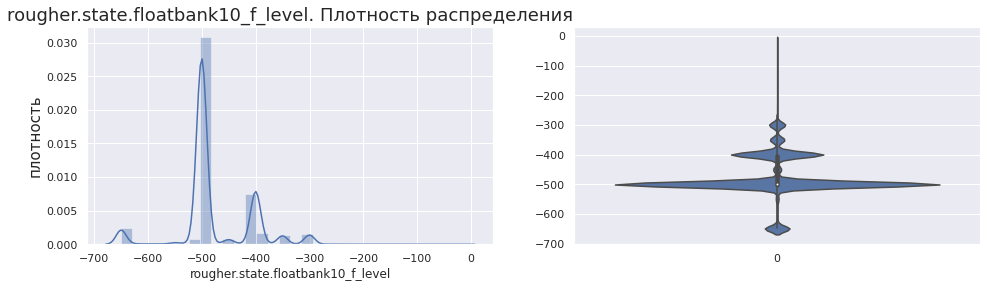

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


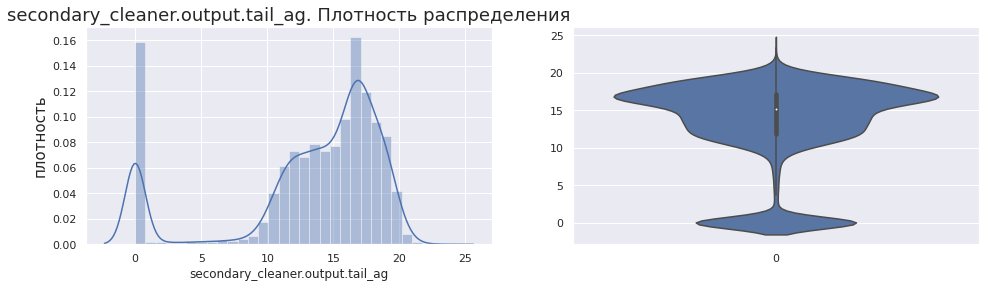

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


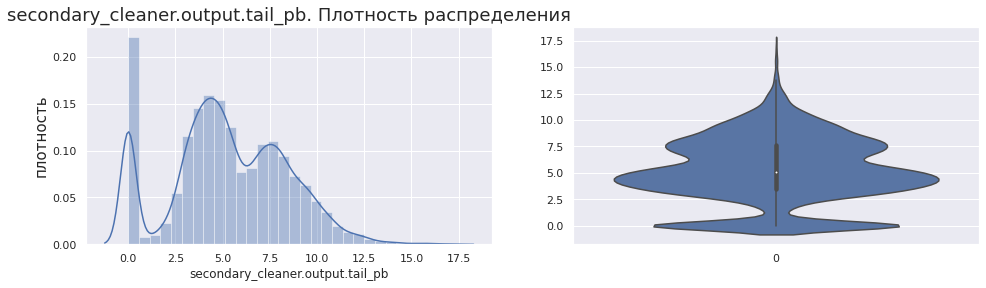

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


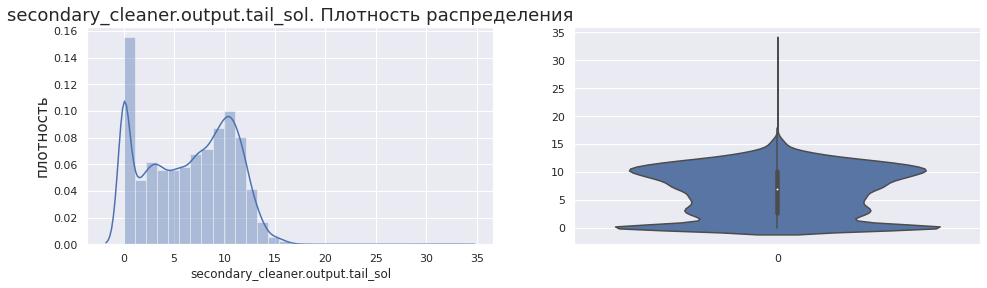

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


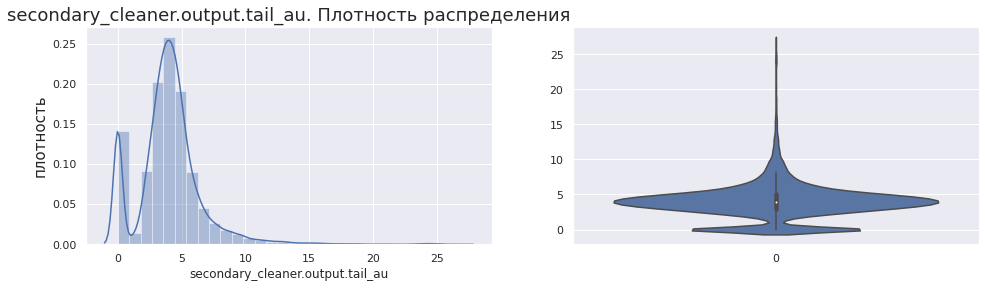

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


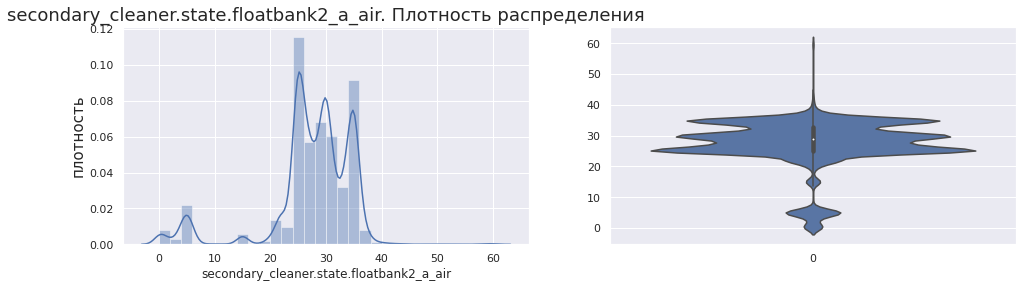

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


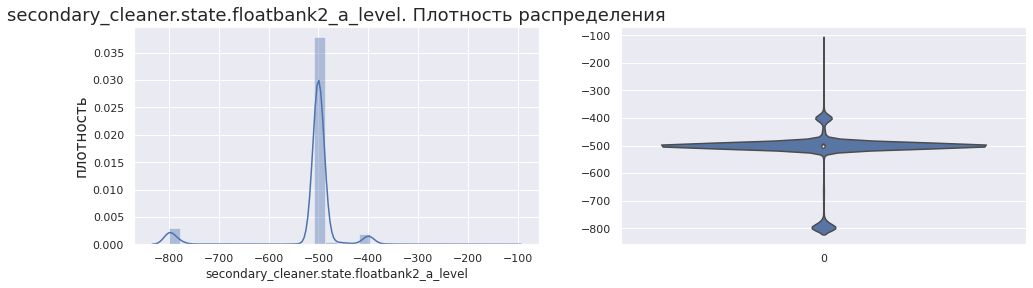

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


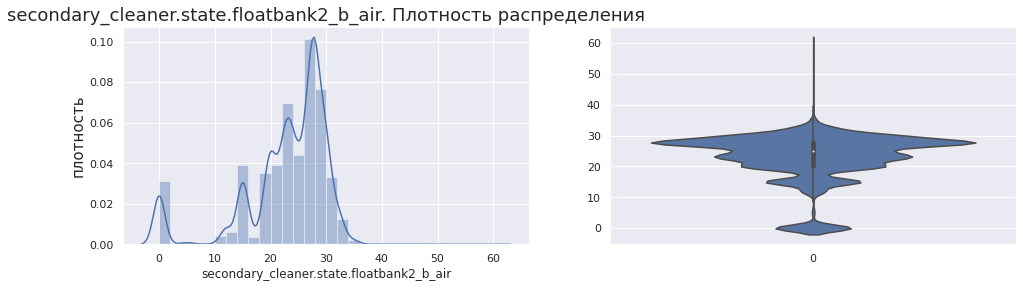

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


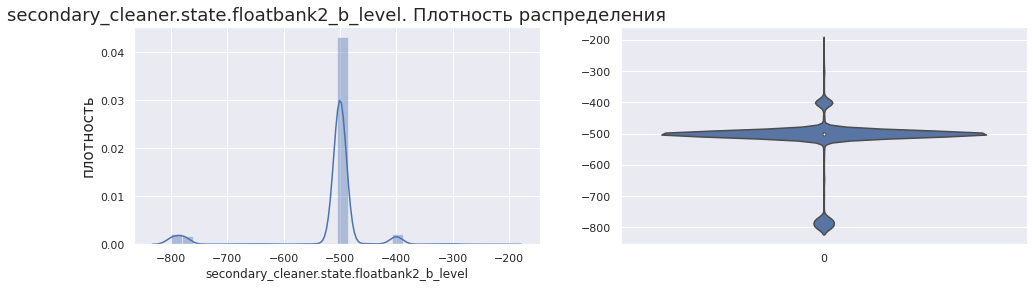

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


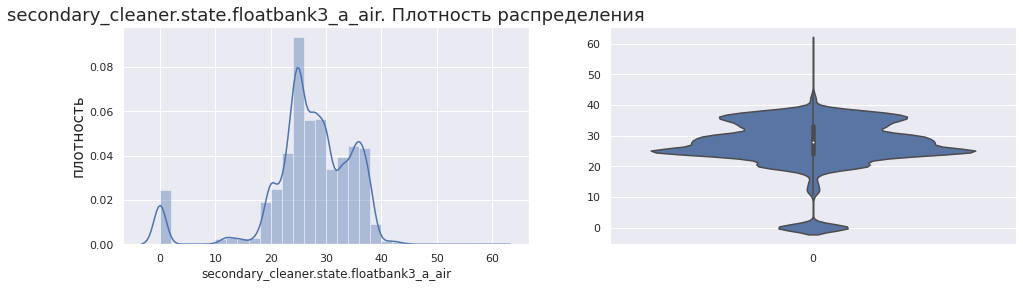

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


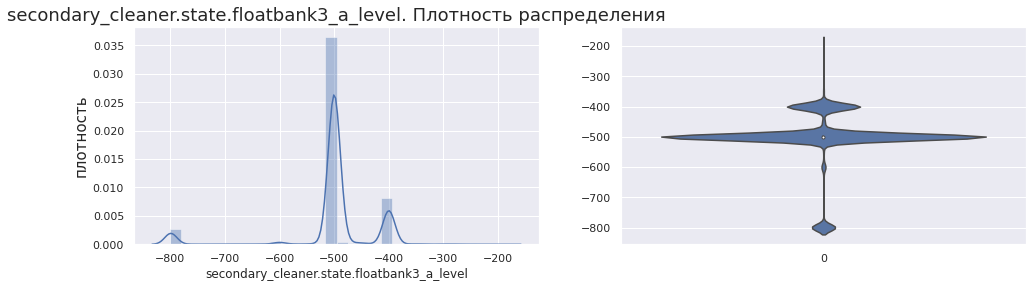

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


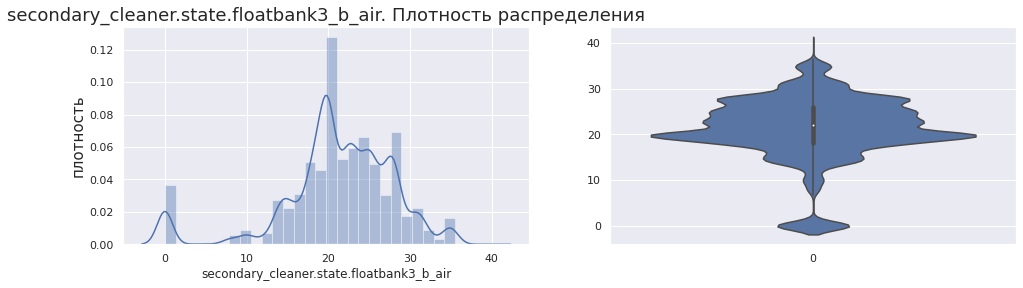

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


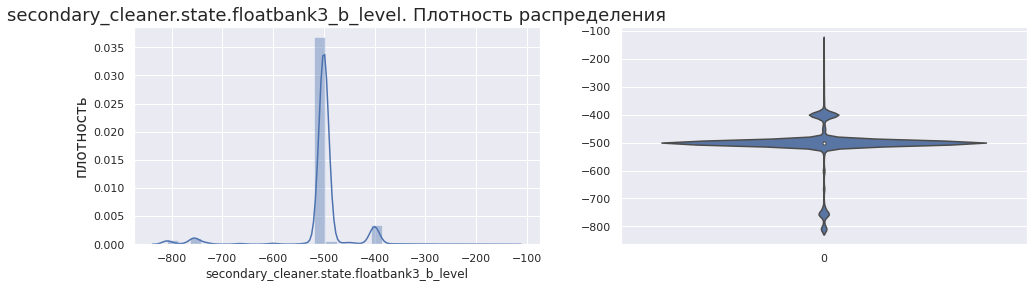

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


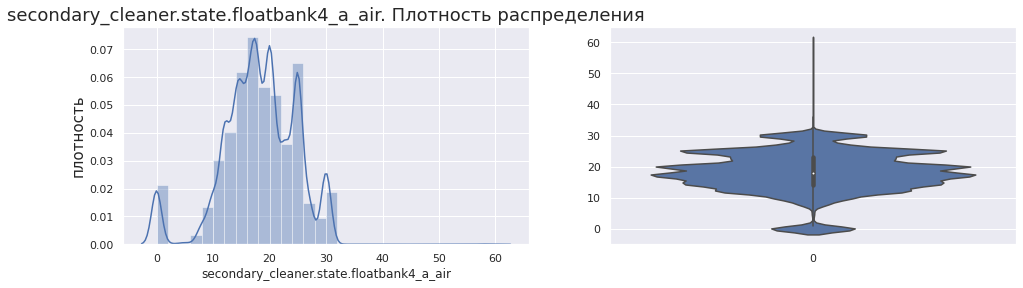

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


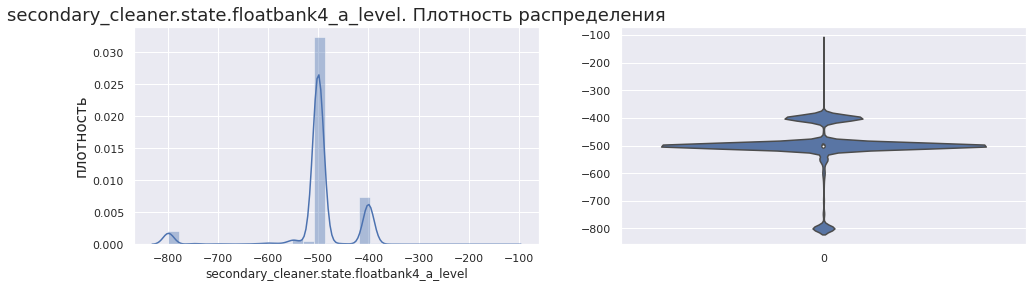

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


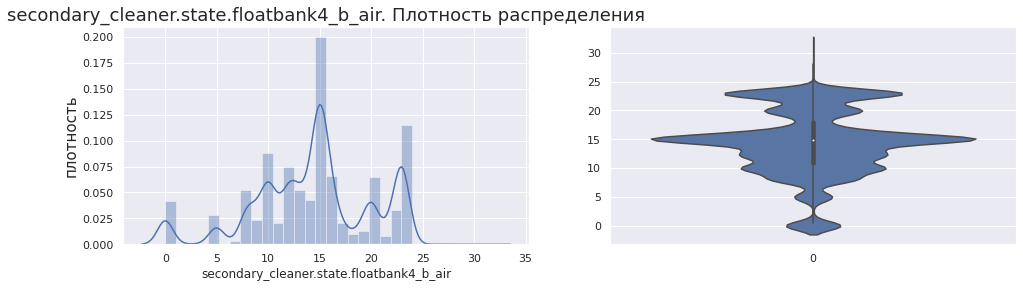

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


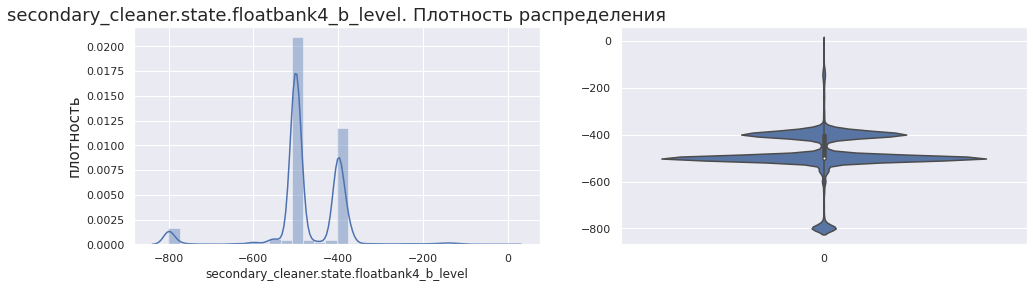

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


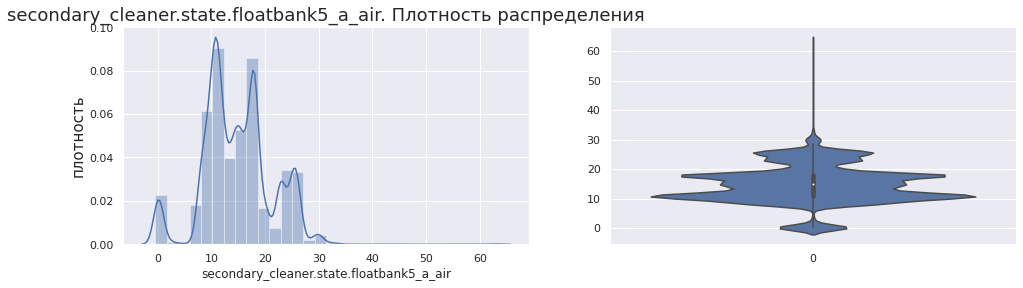

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


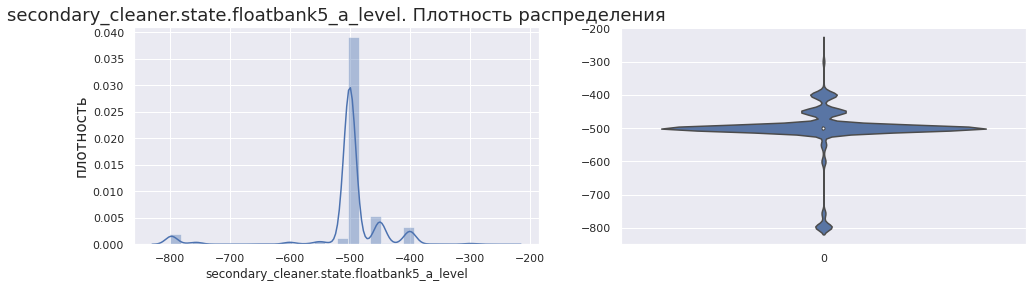

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


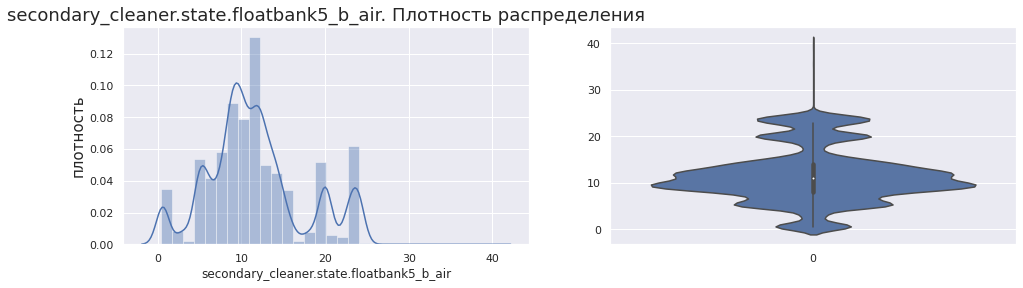

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


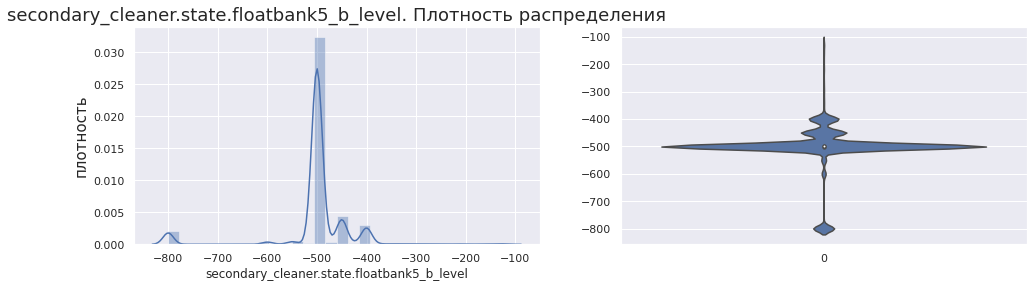

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


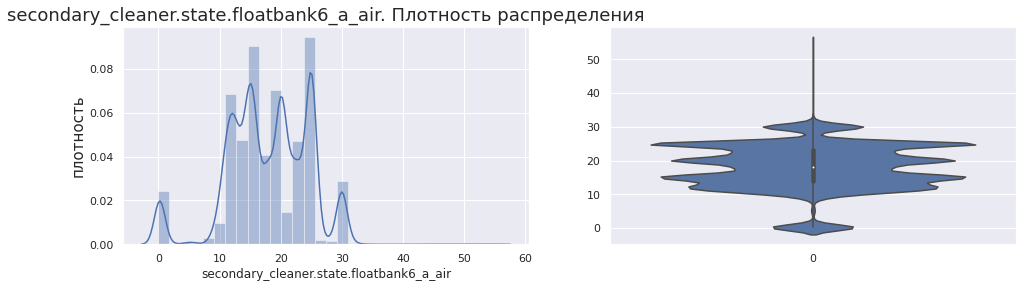

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


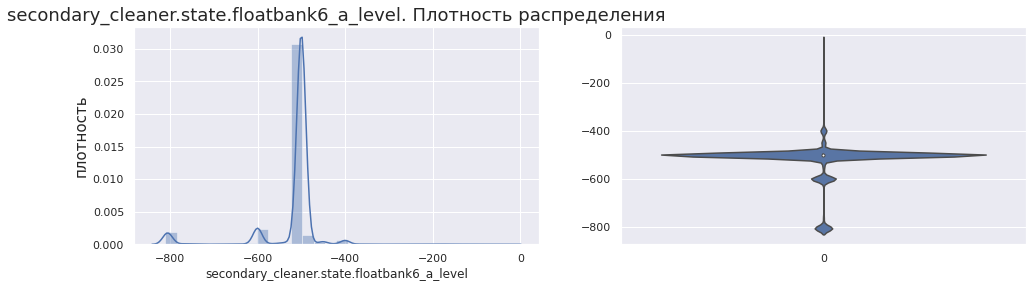

In [7]:
def show_hists(data, data_label, num_bins, rug=False, log_scale=False):
    """
    input: data - данные для построения гистограммы
           data_label - описание данных
           num_bins - количество ячеек
    output: None
    description: Функция строит гистограмму и boxplot для выбранного параметра:
                - Плотность распределения (методом distplot() библиотеки seaborn)
                - Boxplot (метод boxplot() библиотеки seaborn)
    """
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].set_title(data_label + ". Плотность распределения", fontsize=18)
    axes[0].set_ylabel('плотность', fontsize=15)
    sns.distplot(data, bins=num_bins, rug=rug, ax=axes[0])
    sns.violinplot(data=data, ax=axes[1])
    plt.show()
    
for column in full.columns:
    show_hists(full[column], column, num_bins=30)

Распределения некоторых признаков отличаются от нормального.

Также присутствуют большие выбросы. После отбора признаков необходимо уменьшить их влияние на финальную модель (удалить выбросы, или прологарифмировать признак).

Масштабы распределений отдельных признаков сильно отличаются друг от друга (более одного порядка). Отобранные признаки будут нуждаться в масштабировании.

### Проверка расчетов эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно:
- Вычислитм ее на обучающей выборке для признака *rougher.output.recovery*
- Найдем MAE между расчётами и значением признака.

In [8]:
# расчёт эффективности обогащения золота на этапе флотации
C = train.loc[~train['rougher.output.recovery'].isna(), 'rougher.output.concentrate_au']
F = train.loc[~train['rougher.output.recovery'].isna(), 'rougher.input.feed_au']
T = train.loc[~train['rougher.output.recovery'].isna(), 'rougher.output.tail_au']
rough_recov_calc = C * (F - T) / (F * (C - T)) * 100
rough_recov_train = train.loc[~train['rougher.output.recovery'].isna(), 'rougher.output.recovery']

In [9]:
# расчёт sMAPE 

numer = abs(rough_recov_train - rough_recov_calc)
denom = 0.5 * (abs(rough_recov_train) + abs(rough_recov_calc))
N = len(rough_recov_train)
smae_rough_rec = 1 / N * (numer / denom).sum() * 100
print("Показатель sMAPE для 'Эффективности обогащения золота на этапе флотации'")
print("между рассчитанным значением и тренировочной выборкой: {0:.2E}".format(smae_rough_rec))

Показатель sMAPE для 'Эффективности обогащения золота на этапе флотации'
между рассчитанным значением и тренировочной выборкой: 1.15E-14


sMAPE ничтожно мало, следовательно, показатель рассчитан верно. Предположим, что и остальные показатели recovery рассчитаны верно.

Попробуем заполнить признак rougher.output.recovery в обучающей выборке по имеющимся данным

### Анализ признаков, недоступных в тестовой выборке

In [10]:
[col for col in list(train.columns) if (col not in list(test.columns))]

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовой выборке отсутствуют выходные параметры продукта *output* на каждом этапе техпроцесса. Это концентраты и "отвальные хвосты" для металлов *(Au, Ag, Pb)* и солей, а также рассчитанное *recovery* на разных этапах. Эти данные в любом случае не подходят для тренировки модели, так как появляются во время или после измерения целевых признаков.

Также в тестовой выборке отсутствуют расчётные признаки на этапе флотации *rougher.calculation* (концентрация сульфатов относительно золота, соотношение золота и свинца, и др.).

Данные признаки не будут участвовать в построении модели.

### Предобработка данных

Не все признаки подойдут для обучения модели:
- Отберём те, которые больше всего коррелируют с целевыми признаками final.output.recovery, rougher.output.recovery.
- Также удалим признаки, сильно коррелирующие с уже отобранными. Добавление таких признаков не увеличит качество модели, но увеличит её сложность и, возможно, дисперсию предсказаний.

In [11]:
# рассмотрим пропуски и аномалии среди отобранных признаков

input_columns = list(test.columns)
model_columns = ['final.output.recovery', 'rougher.output.recovery'] + input_columns

(train[model_columns].corr()
 .sort_values(by = 'final.output.recovery', ascending = False)
 .style.background_gradient(cmap = 'coolwarm')
)

In [12]:
columns_to_drop = ['primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_b_air', 
                   'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_c_level',
                   'primary_cleaner.state.floatbank8_d_level', 'rougher.input.floatbank10_sulfate',
                   'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_b_air',
                   'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 
                   'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
                   'rougher.state.floatbank10_f_level', 'secondary_cleaner.state.floatbank2_a_air',
                   'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank4_b_air',
                   'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank5_b_level',
                   'rougher.state.floatbank10_b_level']

model_columns = [column for column in model_columns if column not in columns_to_drop]
input_columns = [column for column in input_columns if column not in columns_to_drop]

Выбранные для удаления признаки относятся к параметрам, характеризующим текущее состояние этапов технологического процесса. Скорее всего, они напрямую связаны с оставшимися признаками (уровни жидкости и объёмы воздуха в разных *floatbank* напрямую зависят друг от друга). Возможно, так настроен процесс работы, и лишние признаки можно удалить. Но так может быть не всегда. Если зависимости между признаками изменятся в будущем (уровни жидкости и объёмы газа в разных *floatbank* станут независимыми), разработанная регрессионная модель может потерять свою актуальность. Необходимо следить за данными параметрами и в случае необходимости обновить модель.

In [13]:
#удалим выбранные признаки

train = train.drop(columns_to_drop, axis = 1)
test = test.drop(columns_to_drop, axis = 1)

set(train) == set (test)

False

Единственный признак с большим количеством пропусков *rougher.input.floatbank11_xanthate*. Он сильно коррелирует с признаком *rougher.input.floatbank10_xanthate*. Признаки определяют количество активатора на входе флотации. Рассмотрим их совместное распределение на диаграмме рассеяния.

<AxesSubplot:xlabel='rougher.input.floatbank10_xanthate', ylabel='rougher.input.floatbank11_xanthate'>

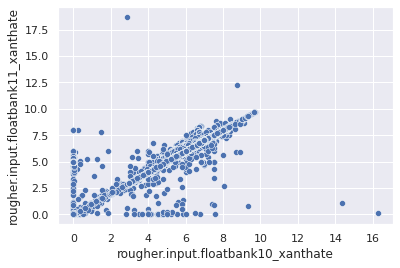

In [14]:
sns.scatterplot(x = 'rougher.input.floatbank10_xanthate', y = 'rougher.input.floatbank11_xanthate', data = full)

Оба признака распределены практически одинаково и в большинстве случаев повторяют друг друга. Заполним пропуски для *floatbank11* известными значениями из *floatbank10*

In [15]:
train['rougher.input.floatbank11_xanthate'] = (train['rougher.input.floatbank11_xanthate']
                                               .fillna(full['rougher.input.floatbank10_xanthate']))
test['rougher.input.floatbank11_xanthate'] = (test['rougher.input.floatbank11_xanthate']
                                               .fillna(full['rougher.input.floatbank10_xanthate']))

print('Количество пропусков recovery на этапе флотации:', sum(train['rougher.output.recovery'].isna()))

Количество пропусков recovery на этапе флотации: 2489


Среди оставшихся признаков практически все имеют пропуски. Но их количество невелико (около 1-2 %). Заполним их значениями в соседних объектах (данные в таблице расположены по времени, и значения соседних объектов мало отличаются друг от друга).

In [16]:
train[input_columns] = train[input_columns].fillna(method='ffill')
test = test.fillna(method='ffill')

**Выводы**
- Данные успешно загружены и проанализированы. Данные соответствуют описанию.
- Показатель эффективности обогащения рассчитан корректно.
- В тестовой выборке отсутствуют параметры продукта, а также расчётные признаки на этапе флотации. Данные параметры не будут учасвовать в построении модели.
- Отобраны признаки, избыточные для модели (некоторые параметры, характеризующие текущее состояние этапов технологического процесса). Они не будут участвовать в построении модели. В случае изменения технологического процесса поведение данных признаков может измениться, и будет необходимо обновить модель.
- Для актуальных признаков были заполнены пропуски на основе имеющихся исторических данных.

## Анализ данных

### Анализ изменения концентрации металлов *(Au, Ag, Pb)*

Для анализа концентрации металлов взглянем на графики изменения зависимости концентрации по времени (для каждого этапа) и на графики изменения средних показателей от этапа очистки.

In [17]:
train = train.set_index(pd.DatetimeIndex(train.index))
test = test.set_index(pd.DatetimeIndex(test.index))
full = full.set_index(pd.DatetimeIndex(full.index))

met_concs = np.array([['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'],
                      ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'],
                      ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
                    )

In [18]:
def plot_met_time(cols, label):
    sns.set()
    f, axes = plt.subplots(1, 1, figsize=(16, 6))
    axes.set_title(label, fontsize=18)
    axes.set_ylabel('концентрация', fontsize=15)
    sns.lineplot(data=train[cols].groupby(train.index.floor('D')).mean())

***Рассмотрим концентрации каждого металла отдельно для разных этапов технологического процесса.***

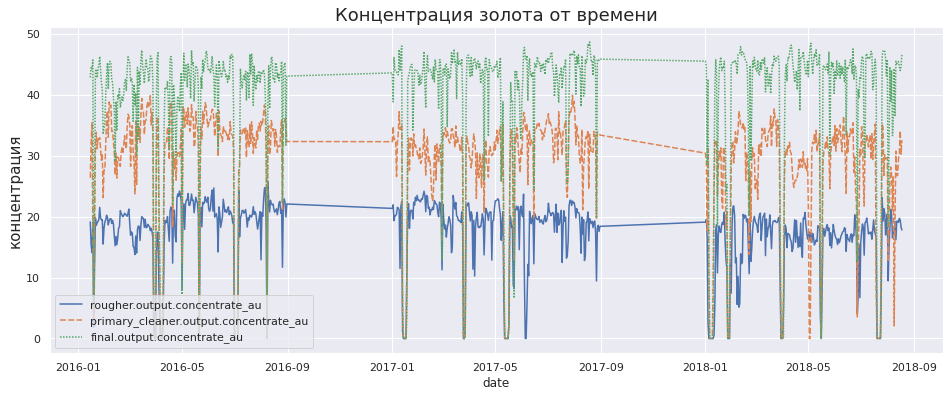

In [19]:
plot_met_time(met_concs[0], 'Концентрация золота от времени')

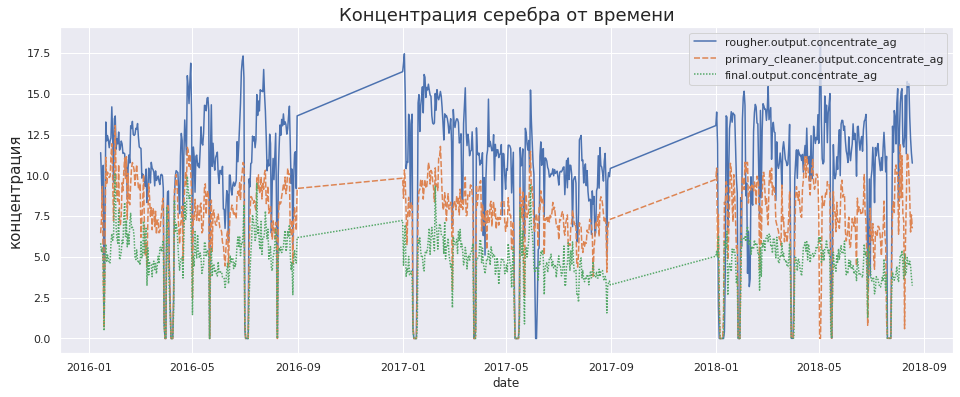

In [20]:
plot_met_time(met_concs[1], 'Концентрация серебра от времени')

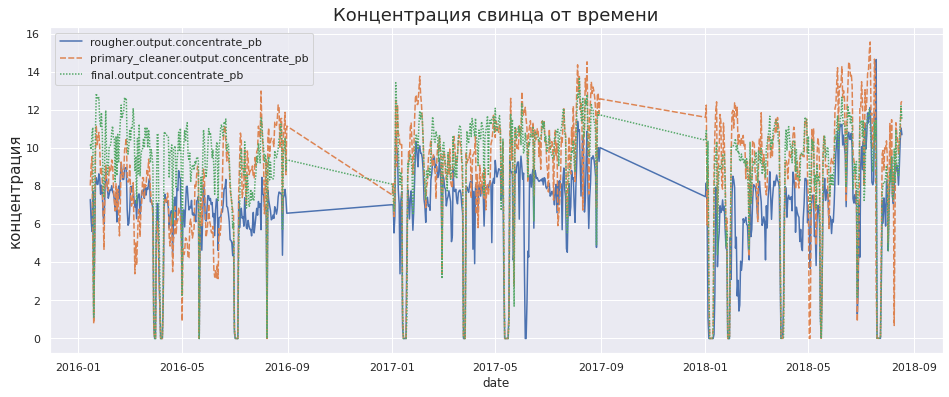

In [21]:
plot_met_time(met_concs[2], 'Концентрация свинца от времени')

- Можно заметить, что концентрация золота с каждым этапом очистки увеличивается, концентрация серебра уменьшается, концентрация свинца немного увеличивается после флотации.
- Периодически графики сваливаются в ноль. Значения неверные. В эти моменты контроль концентрации не проводился или данные были утеряны. Их следует удалить.
- Прямые линии на графике соответствуют временным промежуткам тестовой выборки.

***Теперь рассмотрим отдельно каждый этап технологического процесса***

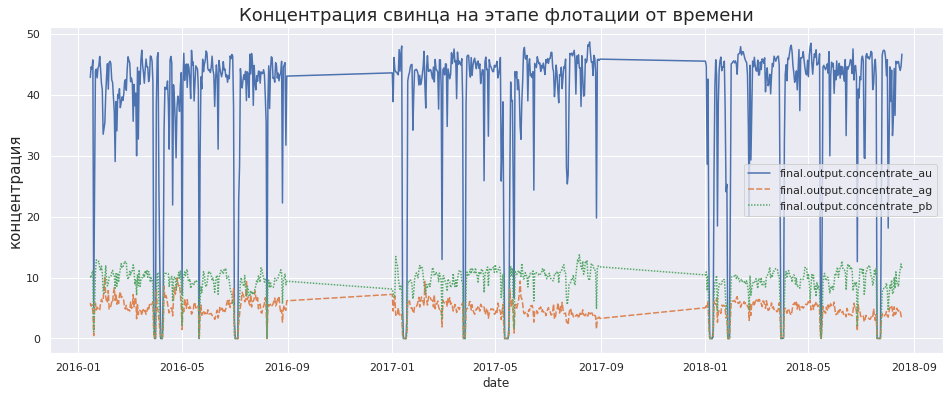

In [22]:
plot_met_time(met_concs[:,2], 'Концентрация свинца на этапе флотации от времени')

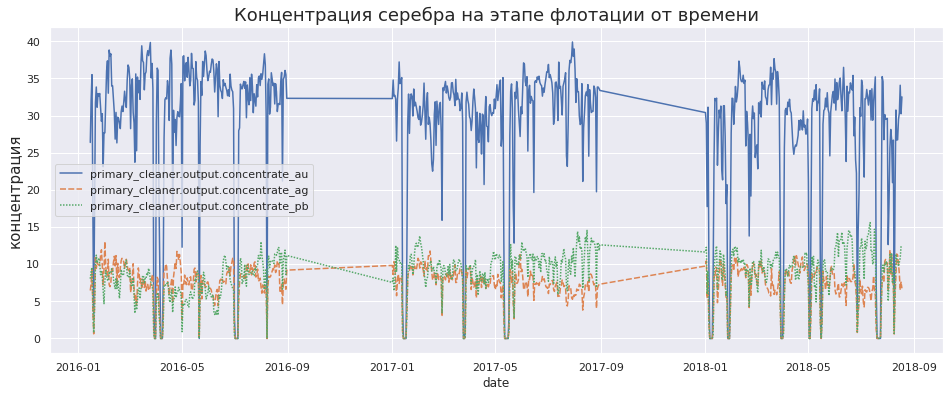

In [23]:
plot_met_time(met_concs[:,1], 'Концентрация серебра на этапе флотации от времени')

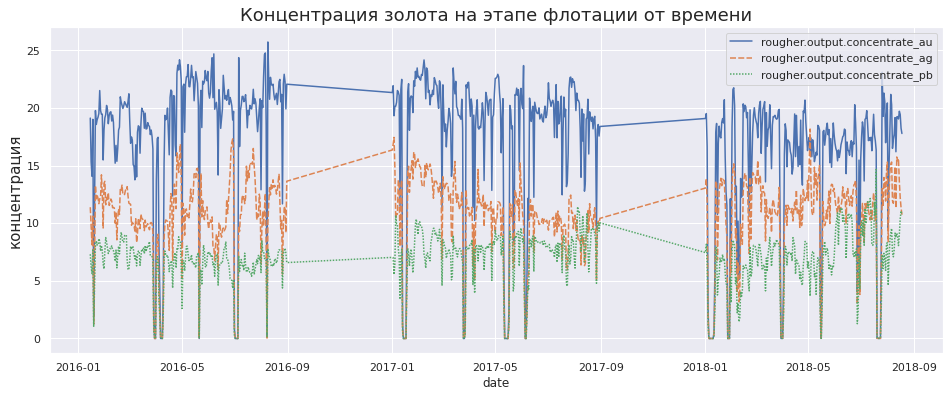

In [24]:
plot_met_time(met_concs[:,0], 'Концентрация золота на этапе флотации от времени')

- На графиках прослеживается увеличение концентрации золота в смеси с каждым новым этапом очистки.
- Также увеличивается концентрация золота относительно других металлов.
- На всех графиках концентрация металлов в среднем не сильно зависит от времени. Это говорит о стабильности тех. процесса и сырья.

***Теперь рассмотрим общий график для средних значений всех металлов на всех этапах технологического процесса.***

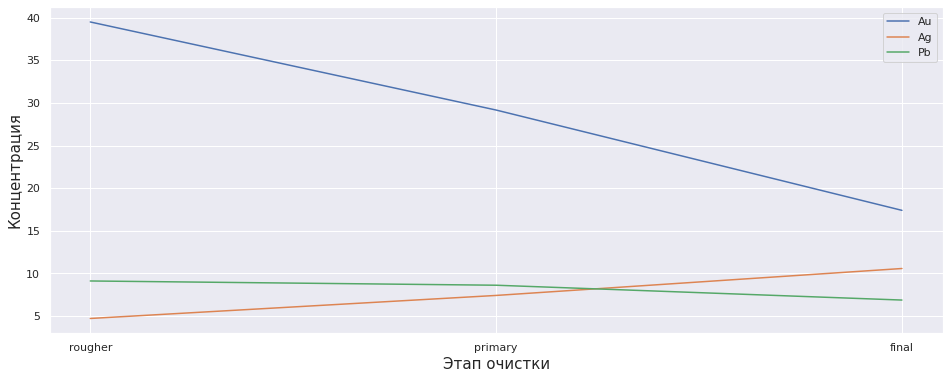

In [25]:
step_names = ['final', 'primary','rougher']
mets = ['Au', 'Ag', 'Pb']

sns.set()
f, axes = plt.subplots(1, 1, figsize=(16, 6))
axes.set_ylabel('Концентрация', fontsize=15)
axes.set_xlabel('Этап очистки', fontsize=15)
for cols, met in zip(met_concs, mets):
    sns.lineplot(data = pd.Series(train[cols].mean().values, index=step_names),
                legend = 'full',
                label = met)
plt.gca().invert_xaxis()

Данный график подтверждает сделанные ранее выводы. С каждым этапом очистки концентрация золота в смеси растёт, концентрация серебра немного падает, концентрация свинца немного растёт.

### Сравнение распределений размеров гранул сырья

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rougher.input.feed_size', ylabel='Density'>

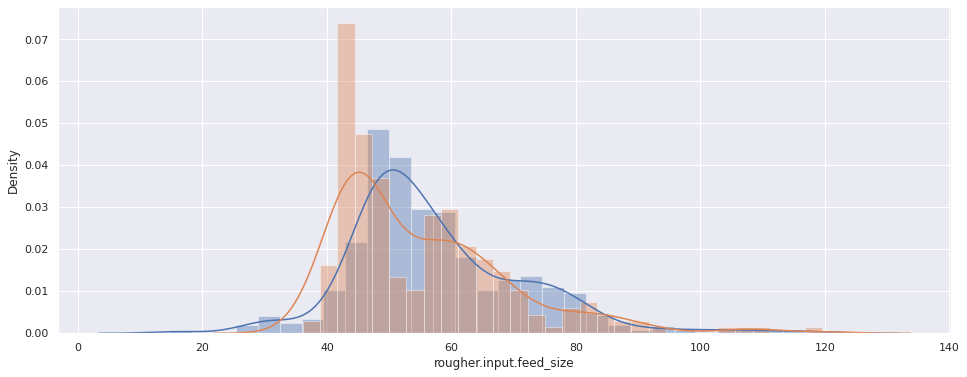

In [26]:
#С помощью гистограммы рассмотрим распределения размеров гранул сырья в обучающей и тестовой выборках
#(для более точной оценки возьмём средние за сутки значения размеров гранул)

train_feed_size = train['rougher.input.feed_size'].groupby(train.index.floor('D')).agg('mean')
test_feed_size = test['rougher.input.feed_size'].groupby(test['rougher.input.feed_size'].index.floor('D')).agg('mean')


f, axes = plt.subplots(1, 1, figsize=(16, 6))
sns.distplot(train_feed_size.loc[train_feed_size < 150], bins=30)
sns.distplot(test_feed_size.loc[test_feed_size < 150], bins=30)

Судя по графику, значения в обеих выборках не сильно отличаются.

Проверим гипотезу с помощью двустороннего *t-теста*. Дисперсии обоих распределений будем считать одинаковыми

Гипотеза Н0:
- "Средние за сутки значения размера гранул в обучающей выборке и тестовой выборке одинаковы"

Гипотеза H1:
- "Средние за сутки значения размера гранул в обучающей выборке и тестовой выборке не равны друг другу"

Определим уровень значимости *alpha = 0.05*.
Для расчёта статистики разности и *p-value* будем использовать функцию *st.ttest_ind*

In [27]:
results = st.ttest_ind(train_feed_size,
                       test_feed_size,
                       equal_var=True)
print('p-value: {:.3f}'.format(results.pvalue))

p-value: 0.016


*p-value* меньше уровня значимости. Отклоняем H0 и считать распределения различными.

Попробуем убрать выбросы в распределениях и провести *t-test* ещё раз.

In [28]:
train_q_75 = train['rougher.input.feed_size'].quantile(0.75)
train_q_25 = train['rougher.input.feed_size'].quantile(0.25)
test_q_75 = test['rougher.input.feed_size'].quantile(0.75)
test_q_25 = test['rougher.input.feed_size'].quantile(0.25)
train_min = train_q_25 - 3 * (train_q_75 - train_q_25)
train_max = train_q_75 + 3 * (train_q_75 - train_q_25)
test_min = test_q_25 - 3 * (test_q_75 - test_q_25)
test_max = test_q_75 + 3 * (test_q_75 - test_q_25)
print('Тренировочная выборка:')
print('- Нижняя граница выбросов: {:.2f}'.format(train_min))
print('- Верхняя граница выбросов: {:.2f}'.format(train_max))
print('Тестовая выборка:')
print('- Нижняя граница выбросов: {:.2f}'.format(test_min))
print('- Верхняя граница выбросов: {:.2f}'.format(test_max))

Тренировочная выборка:
- Нижняя граница выбросов: -6.10
- Верхняя граница выбросов: 119.11
Тестовая выборка:
- Нижняя граница выбросов: -9.38
- Верхняя граница выбросов: 114.91


In [29]:
results = st.ttest_ind(train_feed_size.loc[(train_feed_size > train_min) &
                                           (train_feed_size < train_max)],
                       test_feed_size.loc[(test_feed_size > test_min) &
                                          (test_feed_size > test_min)],
                       equal_var=True)
print('p-value: {:.3f}'.format(results.pvalue))

p-value: 0.208


Без выбросов *p-value* = 0.21 > 0.05. Делаем вывод, что выборки не сильно отличаются друг от друга

***Признак "Размер гранул сырья" можно использовать для обучения модели.***

### Исследование суммарных концентраций веществ

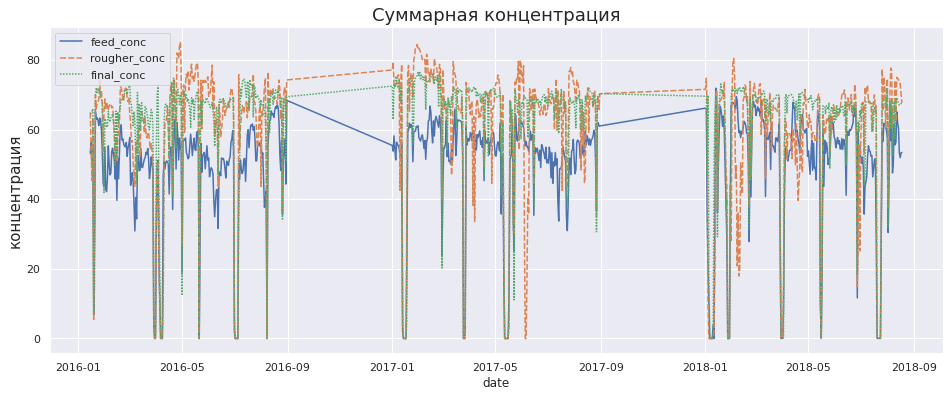

In [30]:
# Рассчитаем суммарные концентрации веществ на разных стадиях 
#(в сырье, после флотации и в финальном концентрате после двух этапов очистки)

train['feed_conc'] = train['rougher.input.feed_ag'] + train['rougher.input.feed_pb'] +\
            train['rougher.input.feed_sol'] + train['rougher.input.feed_au']
train['rougher_conc'] = train['rougher.output.concentrate_ag'] + train['rougher.output.concentrate_pb'] +\
            train['rougher.output.concentrate_sol'] + train['rougher.output.concentrate_au']
train['final_conc'] = train['final.output.concentrate_ag'] + train['final.output.concentrate_pb'] +\
            train['final.output.concentrate_sol'] + train['final.output.concentrate_au']

sum_conc_cols = ['feed_conc', 'rougher_conc', 'final_conc']
plot_met_time(sum_conc_cols, 'Суммарная концентрация')

Как и в пункте 2.1, наблюдаются аномалии (резкий спад суммарных концентраций до 0). В эти моменты целевые признаки не записывались. Данные бесполезны и подлежат удалению.

Удалим все объекты, у которых хотя бы одно значение суммарной концентрации (на входе, после флотации или на выходе) меньше 31.

In [31]:
before_len = len(train)
train = train.loc[(train['feed_conc'] > 31) &
                  (train['rougher_conc'] > 31) &
                  (train['final_conc'] > 31)]


print("Удалено {} объектов".format(before_len - len(train)))

Удалено 2849 объектов


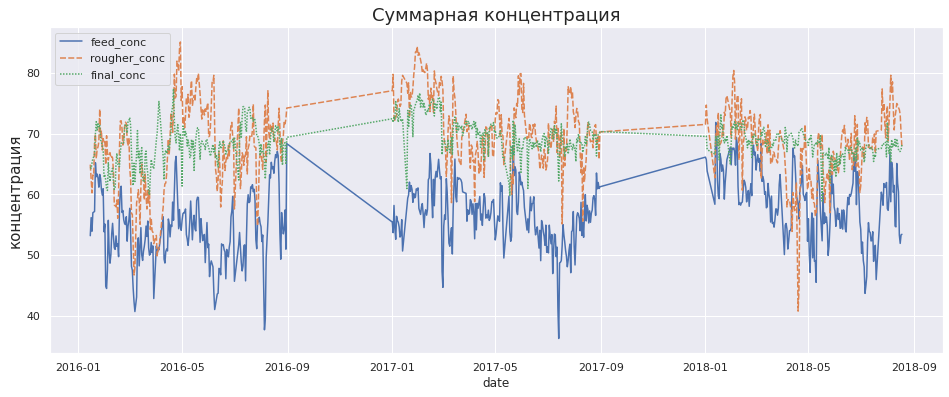

In [32]:
#рассмотрим суммарные концентрации после удаления аномальных данных
plot_met_time(sum_conc_cols, 'Суммарная концентрация')

In [33]:
train = train.drop(sum_conc_cols, axis = 1)

***Вывод***
- Проанализированы концентрации металлов *(Au, Ag, Pb)* на всех стадиях очистки для обучающей выборки. Выявлены аномалии (резкий спад концентраций до 0). Прямые линии на графиках показывают временные промежутки для тестовой выборки.
- Рассмотрены распределения гранул сырья на входе технологического процесса для обучающей и тестовой выборок. Двусторонний *t-test* показал, что распределения не сильно отличаются друг от друга при уровне значимости 0.05 (*p-value* = 0.21).
- Анализ суммарных концентраций подтвердил наличие аномальных данных. Все объекты с суммарной концентрацией смеси меньше 31 были удалены из тренировочной выборки. Всего удалено 2849 объектов (17% данных)

Данные готовы к построению модели

## Модель

In [34]:
#удалим из выборок NaN-значения
test.dropna(inplace=True)
train.dropna(inplace=True)

In [35]:
#напишем функцию для расчета метрики sMAPE
def smape (target, predictions):
    return 100/len(target) * np.sum(2 * np.abs(predictions - target) / (np.abs(target) + np.abs(predictions)))

In [36]:
#и функцию для расчете итогового sMAPE
def final_smape (rougher, final):
    return 0.25 * rougher + 0.75 * final

In [37]:
#подготовим features и target для обучающей выборки.
target_rougher = train['rougher.output.recovery']
target_final = train['final.output.recovery']

diff_columns = list(set(train.columns.values) - set(test.columns.values))

features_train = train.drop(columns = diff_columns)

In [38]:
#масштабируем признаки
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)

Проверим несколько моделей методом кросс-валидации и выберем лучший вариант

In [39]:
model_dtr = DecisionTreeRegressor(random_state=1234)
cross_val_score(model_dtr, features_train, target_rougher, scoring = make_scorer(smape), cv=3).mean()

8.422486055640638

In [40]:
model_lr = LinearRegression()
cross_val_score(model_lr, features_train, target_rougher, scoring = make_scorer(smape), cv=3).mean()

8.4840336710169

In [41]:
model_cb = CatBoostRegressor(iterations=2, learning_rate=1, depth=3)
cross_val_score(model_cb, features_train, target_rougher, scoring = make_scorer(smape), cv=3).mean()

0:	learn: 3.9744174	total: 51.5ms	remaining: 51.5ms
1:	learn: 3.7844470	total: 56ms	remaining: 0us
0:	learn: 6.0135438	total: 3.21ms	remaining: 3.21ms
1:	learn: 5.6380100	total: 6.2ms	remaining: 0us
0:	learn: 5.6362979	total: 3.1ms	remaining: 3.1ms
1:	learn: 5.3703257	total: 6.22ms	remaining: 0us


7.594905349942304

In [42]:
model_rf = RandomForestRegressor(random_state=1234, n_estimators=10)
cross_val_score(model_rf, features_train, target_rougher, scoring = make_scorer(smape), cv=3).mean()

7.59731399032844

*Лучший результат показывает модель CatBoostRegression*

In [43]:
#подготовим признаки для тестовой выборки
test = test.join(full[['final.output.recovery', 'rougher.output.recovery']], on='date')

target_rougher_test = test['rougher.output.recovery']
target_final_test = test['final.output.recovery']


features_test = test.drop(['final.output.recovery', 'rougher.output.recovery'], axis='columns')

In [44]:
#масштабируем признаки
scaler = StandardScaler()
scaler.fit(features_train)
features_test = scaler.transform(features_test)

In [45]:
model_cb = CatBoostRegressor(iterations=2, learning_rate=1, depth=3)
model_cb_1 = CatBoostRegressor(iterations=2, learning_rate=1, depth=3)

cb_rougher = model_cb.fit(features_train, target_rougher)
cb_final = model_cb_1.fit(features_train, target_final)

cb_predictions_rougher = cb_rougher.predict(features_test)
cb_predictions_final = cb_final.predict(features_test)

0:	learn: 5.5163648	total: 7.45ms	remaining: 7.45ms
1:	learn: 5.2126194	total: 13.9ms	remaining: 0us
0:	learn: 7.2324364	total: 6.1ms	remaining: 6.1ms
1:	learn: 6.8154211	total: 12.3ms	remaining: 0us


In [46]:
#посчитаем sMAPE для обоих признаков и итоговый

smape_rougher = smape(target_rougher_test, cb_predictions_rougher)
smape_final = smape(target_final_test, cb_predictions_final)
final_smape(smape_rougher, smape_final)

11.95024066243663

In [47]:
#проверим качество модели, сравнив с константной. Для этого будем использовать модель DummyRegressor.

dummy = DummyRegressor(strategy = 'mean')
dummy_1 = DummyRegressor(strategy = 'mean')

dummy_rougher = dummy.fit(features_train, target_rougher)
dummy_predictions_rougher = dummy_rougher.predict(features_test)

dummy_final = dummy_1.fit(features_train, target_final)
dummy_predictions_final = dummy_final.predict(features_test)

In [48]:
smape_rougher_dummy = smape(target_rougher_test, dummy_predictions_rougher)
smape_final_dummy = smape(target_final_test, dummy_predictions_final)
final_smape(smape_rougher_dummy, smape_final_dummy)

9.556410812325865

Обученная модель предсказывает результат точнее константной. Это говорит о том, что построенная модель адекватна.

## Вывод

- Данные успешно проанализированы. Показатель эффективности обогащения рассчитан корректно.
- Отобраны признаки, избыточные и нерелевантные для модели (некоторые параметры, характеризующие текущее состояние этапов технологического процесса). В случае изменения технологического процесса поведение данных признаков может измениться, и будет необходимо обновить модель.
- Для актуальных признаков были заполнены пропуски на основе имеющихся исторических данных.

- Проанализированы концентрации металлов (Au, Ag, Pb), а также суммарные концентрации веществ на всех стадиях очистки.
- Рассмотрены распределения гранул сырья на входе технологического процесса для обучающей и тестовой выборок. Двусторонний t-test показал, что распределения не сильно отличаются друг от друга при уровне значимости 0.05 (p-value = 0.59).
- Анализ суммарных концентраций подтвердил наличие аномальных данных. Все объекты с суммарной концентрацией смеси меньше 31 были удалены из тренировочной выборки. Всего удалено 2849 объектов (17% данных)

- Данные обучены на моделях линейной регрессии, случайного леса, дерева решений и CatBoostRegression
- Применены техники кросс-валидации для оценки качества моделей

- sMAPE на тестовой выборке (модель CatBoostRegression) 10,5, что точнее констанстной